残差网络
===

# 1.传统网络的问题
传统的神经网络中，随着网络层数的增加，网络发生了退化(degradation)的现象：随着网络层数的增多，训练集loss逐渐下降，然后趋于饱和，当你再增加网络深度的话，训练集loss反而会增大。

注意这并不是过拟合，因为在过拟合中训练loss是一直减小的。当网络退化时，浅层网络能够达到比深层网络更好的训练效果，这时如果我们把低层的特征传到高层，那么效果应该至少不比浅层的网络效果差，

或者说如果一个VGG-100网络在第98层使用的是和VGG-16第14层一模一样的特征，那么VGG-100的效果应该会和VGG-16的效果相同。

所以，我们可以在VGG-100的98层和14层之间添加一条直接映射(Identity Mapping)来达到此效果。基于这种使用直接映射来连接网络不同层直接的思想，残差网络应运而生

# 2.残差网络
## 2.1.残差块
残差网络是由一系列残差块组成的（图1）。一个残差块可以用表示为：
$$x_{l+1}= x_l+\mathcal{F}(x_l, {W_l})$$
残差块分成两部分直接映射部分和残差部分。$h(x_l)$是直接映射，反应在图1中是左边的曲线；$\mathcal{F}(x_l, {W_l})$是残差部分，一般由两个或者三个卷积操作构成，即图1中右侧包含卷积的部分。

![image](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAKAAAAFSCAYAAAB14tSLAAAgAElEQVR4Ae1d%0AB1gUR/v/3R29SJOOFHvDGhAs2EDRGKNRE6NGjTEajS1qNMYoRv1iTEzTz/I3%0AJNEvMbYYWyI2sKCAvYstokgRpEiH4+72/8yeh8dxcAdc2Q0zz3PP7s68M/PO%0Ab3737s7s7DsChmEY0EARMBICQiPVS6ulCLAIUAJSIhgVAUpAo8JPK6cEpBww%0AKgKUgEaFn1ZOCUg5YFQEKAGNCj+tnBKQcsCoCFACGhV+WjklIOWAURGgBDQq%0A/LRySkDKAaMiQAloVPhp5SaGhiAvLw/5+fmGrlar+ry8vCAQCLSSpUK6QcDg%0ABCwvL0dxcbFutKel8B4Bzt+CpSlx2LpsPPoGdEXXV0Lw3obLyJYB4oe7MWtg%0AIHqPW4btFzMh431XNMwGGNwC1hZmkVd3TFjaDK6l4zB/31PkSsxgKwTMnN3Q%0A2LU35q9agtc8RbUtlspzBAHOW0AWJ6Erwj/7D8Y1BxK3rkTkjTSc3HgAjrOX%0AqpCvGCnnfsHHIydh400JRyCmatSEAD8ISFpgE4gZEePQXHwVG6d+gCPNZmJa%0AV1uVtlnBq4Utigo90LYF5427iu4N85I/BCQcDPgQC97whDQnBUkZhZCq6bPC%0A8wn4p00wupirSaRRnEOAVwSUpsQguiwUozoJcO3Hpdh0o0wF0DJcPnMTvsGB%0AsFZJoZfcRIA/BCy6hp/WJyJk3kIsjngfHQW38POyTbiqPKMjvo4zl50RGOQI%0A/jSMm8QwlFb86CdZOqJWfInH/aahn7MQZm0mYelkfwhvR2LRV6fYaRkCmOTu%0AWVy0fAXdPeio2FAEqm893Cdg8X38vXwmlvyVgbyUe8ggE37SXJTYeMBJWI6k%0AnYsw58vduJRRjuSz51DSJRjN6PijvrwwWH6BoT9Mz8rKQnZ2tu4bKEvDr5PG%0A4ebrG/Fhvxbwtqv9f6tly5b0VZzue6bGEmvfSzUWZ8RESTIeZznC1soUDmSm%0AmgZeIMBrC3j06FEIhUKEhobqBGxqAXUCY60K4bWpuHv3LhITE2vVYCrMLQR4%0ATUBuQUm1qQsClIB1QY3m0RkClIA6g5IWVBcEKAHrghrNozMEKAF1BiUtqC4I%0AUALWBTWaR2cIUALqDEpaUF0QoASsC2o0j84QoATUGZS0oLogQAlYF9RoHp0h%0AQAmoMyhpQXVBgHcELC0tVdtOqVSKsjLVJfpqRWkkhxDg3dLNx48f45NPPkGH%0ADh1w8+ZNFsqnT5/izp07+O233zgELVVFGwR4R8BWrVqBLJvauXNnRftu3bqF%0AhQsXwtLSsiKOnvADAd7dggmss2bNgqmpaQXCjo6OGD16dMU1PeEPArwkoKen%0AJ95+++0KlCdPnkytXwUa/DrhJQEJxNOmTYO1tTWo9eMX4VS15d0zoKIBDg4O%0AGD9+PGv5rKysFNH0yDMEeElAsViM6dOnIy4uDmS3WfKl3aeffsoz6Km6BAFe%0A3oLnz5+PCxcuQCaTsQTctWtXpVEx7Vr+IMBLApL5P+VJZzI5fe3aNf6gTjWt%0AQICXBPTw8GA/x1S0QiQS4dSpU/j9999RWFioiKZHHiDASwJ+8803aNy4MczN%0Azdmfv78/vvrqK5w/fx79+/fHsmXLQD7ZpIH7CPD2w/Tc3FysWLGCRXjlypVQ%0AjISfPXuG3bt3gzwXuru7s/OF4eHhMDMz09gb9MN0jRDpXICXFpCgQKZh/Pz8%0A2J+CfCTe2dmZHSFHR0eDTFDv378fffv2xZo1a5CSkqJzAGmB9UOAtwTU1Gzy%0AXEhuxz/99BP7bEhWy4waNQpTpkzByZMn2RG0pjJouv4R+NcSUBk6Hx8fdrEC%0AId6gQYOwYcMGhIWFYfPmzcjJyVEWpecGRqBBEFCBKRm0DB8+nH0+XLt2LZKT%0Ak0GeD+fNm4dLly4pxOjRgAg0KAIq49quXTuQwQt5VuzYsSM+++wzdo3hxo0b%0AUVBQoCxKz/WIQIMloAJTW1tb9p1yVFQUfvjhB5w4cQK+vr7sQObGjRsKMXrU%0AEwINnoDKuJLRMpm+IW9ayBTO4MGD0bNnT3YQQ94/06B7BCgB1WBKyLdkyRI8%0AevQI5L3zli1b4O3tjUWLFrFxarLQqDoiQAlYA3BkKmfYsGEgnlhjY2NBrGBA%0AQACGDBmCv//+u9qpnOo+nKqhqgabRAmoZde3aNEC5BXgkydPMHLkSCxfvhzN%0AmjXDl19+CfL2RTls27YNhw4dUo6i59UgQAlYDTDVRVtYWGDixIk4d+4c/vjj%0ADzx48ADkQ6mxY8fizJkzbDZy6yYkjY+Pr64YGv8CAUrAelCha9euiIyMxMOH%0ADxEYGMi++iOfi5J30SUlJXj11VdBvtijoXoEKAGrx0brFHt7e8yePZv9Npkc%0AFStxyIKJgQMHshPeWhfWwAR5uSTf0H30119/gZBJUyCfB5DXe8ohNTUV3bp1%0AY0fVZM6xoYQ+ffqgSZMmGptLCagBoqSkJLz22msYNfItDZJAamoKkh8nw9fH%0AFxYWlrCwtIAlOVpY4MjhY+zaRY2F/AsE4uPPonef3lp5qqAE1NDhZBWNr68f%0A/m/DjxokabICgd1/7MTpsycVlzUe6TNgjfDQRH0jQAmob4T1Ur4MBelJSC8i%0AW4fWHKTJu7HovQgcytQsW3NJ+kmlBNQPrvottfQQPu7TFYNWnoUmh3RM9i2c%0APnYG9/KZanUSP7uP28l5MAZFKQGr7RYOJ1j0xvxftmPTtK4wr7eaYlz64U2E%0Azv4daUZgIB2E1LsDtSlAhmdXDuFsqT8GB/uA/TxKkoyEQzdgETwInZzldqA0%0A6TSi/nFCv37tQLY7Lnt6BSdPXUCy1B3+PfoiyMemojJJaQnKJS/tR+HDWByJ%0AvYEsgSNc7M0hENiiZa9+aFmRoxCPE44hJrEc3t3D0beVA4SQIOVCFOIfF0Ga%0AcwvRB/fBybUTBgT5ynWsyKu/k5ct0F8dtGQwyD31HaZ9sAanXzh4FZ//L6ZP%0AHY9FOx9ByiJUhOhv3sVHW69ADBnSoxYgvO+b+PLQZVw9+jXeDQvD/Kin8tuk%0A5B52LZuCFQeTIYUMzw7PQWj4NPx89jJObFmMae/PxIpN23D6yQuTJsvEscUD%0AMXj2JuzdtgzvDAzDoujnAApw/eBm/HntOaSpsfjf5vXYfOAa8g1oCSkBDfL3%0AEKHpgFC0zo5F9BWyrlCC+7HxyBAyuH4qBuz4oPQ8YuJKERAWCqfiU/gmYjus%0APzyAw1s3Yf2W49g92RQ7Vm0Cm11ZZ+lj7Fi/HaIJW7F3cyR2HN6J6a2kcBuy%0AFO/7v7jByTKQ5fYxDp09jgNHorC0cxp2/HqYfFuIwcv34uuhHjDzn4qtB4/h%0AwBevo7EBWWHAqpRRa3jnJi3D0b9ZKk7H3IRElobYhCcIfmskXK7G4HQeIL5+%0AHLG5XTCgnwsk1w8hOtUZnmY3cPDP3fjjz/24LXWAWdJlXM1VNU/lKC8HLKys%0AISKwCi1gaiJFcVEJKoYdJv54e+Yw+BA+irwQ0MUT5RmpnOgE+gxoqG4waYcB%0Afb2x/uRx3J/iiTOJrdHny2HwOD4T0Wdz0f72aaT7v4kwdyFk154jX1aAhwnH%0AcMxCoaArBo7uCn8bFZshaoq+vXzx5cYpmPq8P9zSjmF7Zm8sGdEKpHMliuwV%0ARyHMzcyB8qopFSIGPKEENBjYZug0sD/cf4lB1EFvXPHoiYV+PeAVJMPS4/vR%0A8sEDtAkbiCYiQOrihsYiB/SasRFLu6jpImXuiM9h18FCvDZnFroUJqGg83T8%0Atmwkgj1Ze6hl6wSArMJeaplHN2IqfyfdFEpLUY+AWedw9HW8jJ/WnoRFt95o%0AaWaHnn27If/4avxyswX6hzVlb6Nm/oMQ1uQhdn73M268GBFIcu/gZOxtVHG9%0AxMgAJhsXjsUhtRxA2TMkJiQgqYqgep0AERwcG0H25DZu5UlQkFfwYlBUnbxu%0A4ykBdYtnzaVZBCG8jyMy0qXoFtKFncNz7BOGV4pS8cxvAAa1fGHtLLpjweY1%0A6Je+CqGtPeDXugl8Ow9GxN//oIR9BBRCKASEQhPAtBmCAlxRWlQKWXEuMpLO%0A4Y/VY9Br8Kc4nU+eCYUQQAiBkkEUCgRsvFxZEVq8NgH9pTswpp0L2k/ZJR8U%0A1dwSnaXy1jkRQWDdunUsEDNnztQJIOqcE5EVz2FhA3D5vI78D0pLUVAkg1Uj%0AK/mggTynFT1HiUkj2JpXtQfi/DSkZctg7+EFe6VZZ0lRAcQWtjC5ugS937iM%0AiXEHMdVTnl969yuEhf2BPvvjsLQzUFQohoXNy/ogKUaB2Ay2Vkq3d0kBMtLz%0AYObiBQeleuoCrGIxgjb7tihpUJeqaJ5aIyCygG2jyrlMrO1R3UpBs0Ye8FWR%0AJ7lNrG3lgwxza1jiHg5FboFb37ZwE6QhfssOPGwyAMtayLvX2kalm02sYKsS%0ABRNbuDapTovK+urySlUNXZZNyzIAAibtP0LkZlP8d/s+bDqzBeVWzvDtMA2/%0ALZ+Ani9fnBhAk7pVQQmoATfiT+bRoyQMHf6qBknDJ2dkZsDG2obdroLUbmpj%0AC1OUIvPmPnw1Yx++MrxKbI1Xr17ByFEjtaqdElADTGRZOXFc9Pw5eXXFrbBq%0A1SqQD6MGDBjALcUAdO7cWSudKAG1gKlLly5aSBlehHhsaNu2Lfr162f4ynVU%0AY9Vhl44KpsVQBLRBgBJQG5SojN4QoATUG7S0YG0QoATUBiUqozcEKAH1Bi0t%0AWBsEKAG1QYnK6A0BSkC9QUsL1gYBSkBtUKIyekOAElBv0Oqn4Oq8r0okEpAf%0A3wJ9E8KzHsvOzsaYMWNAvE8Rv4TEdTDZOzktLY11mMmz5rArevimc4PW19PT%0Ak93XhLgIJuHs2bPskeyJJyALTXkW6C2YZx1G1F24cGElV2/kxT9xIcfHQAnI%0Aw14jVpBsuqgIZH9kPlo/oj8loKIXeXZUWEE+Wz8COR2E8Ix4CnUVVjA0NJS3%0A1o8SUNGbGo8ZGiWMIbBs2XQ4ONgD4KJ+rlpBQi2gVjBxU8jR0YGbitVCK/oM%0AWAuwqKjuEaAE1D2mtMRaIEAJWAuwDC1aGrUQLRxawM6uBRycO6Flp5F47/t4%0AZCgcZJWdwMxWreHcehr+lyT3MsjqKEvBxsH+CFp+09Aq17o+SsBaQ2a4DJLM%0AdKQwwVh1Jgpxxzdj9WgrRC94H7N2PpM7qizPRHJyKcRpf+Ozz48iR6EaI0VR%0AQQHyCjV5kFZkMN6REtB42GtXs8AKLs2ao03HQAyfOwejW+ThYvw9ED9EbBDa%0AY9CkQZDt+hrfnuc+4RRqK46UgAokeHCUZdxBYoYFWrT1galCXwawDZ2NjwKS%0AsWHpdijfiRUiXD5SAnK5d4huxRfxwzuTMXL4WwgI/gwXAhZizSSvyq+wRE3x%0AwYoxcD25DisPce8D+pogpgSsCR0upJk4oVVQAHr0CEb4kGDYxn2B0XOPqrhQ%0AE8C650xEDCvH9ohNuMCjOzGdiOYCyWrSwcwP4R9OxUgrIiTD1A6j0W7uf/Hr%0A3P6Y56KUUeiMUREfYEO3HxCxtTf6KCVx+ZRaQC73ThXdhHDx8YItk4/c3Kou%0AdUVtJmDlZGecWPMjLrzYDqJKERyLoATkWIdUVacM+ZkZSE9Pxb2EfViy6hBy%0Am/dFeDt1Ny9r9Fw4D0OLj2LfVX4sz6cErNrjnIkR2ljDMj8K7/l1hKdnIDoO%0AWo5op7HY+udC9CTe8wXEVa+AdderUFroOhSfL+kFRwhgbcPetxVJnDyq+xtx%0AUtGGqJTViI3IkW6svunWI7Dj6WAIbJR96orQevp2pE0WA2bspmDV5+dACiUg%0ABzqh7ioIYW5jrTa7iAfkI4rTW7Da7qORhkKAEtBQSOuhnoSES8jIeKaHkg1X%0AJL0Fa4W1dqt7tSpKh0IbNuwAWZI/fvx4HZZq2KKoBTQs3rQ2FQQoAVUAoZeG%0ARYAS0LB409pUEKAEVAGEXhoWAUpAw+JNa1NBgBJQBRB6aVgEKAENizetTQUB%0ASkAVQOilYRGgBDQs3rQ2FQQoAVUAoZeGRYAS0LB417s24pb3448/RnR0NAoL%0AC5GZmYndu3ezceXlFR9r1rseQxVA3wUbCmkd1dO0aVPcu3cPa9asYUvcu3cv%0Ae1y7di1MTSs+1tRRbfovhlpA/WOs8xoiIiIqlenu7o7333+/UhxfLigB+dJT%0ASnqS/YuHDh1aEbNo0SJYWJA1+vwLlID86zNWY4UV5LP1Iw2hz4A8JaDCCpL1%0AgHy1fpSAWpLvQW6hlpKGFZu2aAma+PiCi/o1d7DRCgxqAbWCiZtCzVu15qZi%0AtdCKPgPWAiwqqnsEKAF1jyktsRYIUALWAizdi5bi1PyO6OLrgc6+XujSvBUG%0ADZ2GyNNPoeRwt8Zqi/dMQECbqThWxRdMAfZP9EHvj46isrMsMa6u6I6ug7/H%0AP9pWUqMG9UukBKwffvXMLUF2WiokgYvxW9RhbP1lGfoLo/HN+KnY/lg7djDi%0AUhQXlUCs8BtdoZEUZSVFKC6pTD+SXF5ShNKSYkiq+jeqyG2oEzoIMRTSNdQj%0AtHZD0zbtYYn2aOuejnM9vsa5i6UY5/PC60FZOm6ePIGryRK4+IegR5Av1PtD%0AqKESjiZRC8ixjilJeYIcuMDNQ/5eV5b+F1aEd8eULw/i+tXD2PBuCN6a/5eK%0Ag0qONaIW6lALWAuw9CVafncf1q+8DnHWXcT/HQ+bd9bi3UDiWKgQ8d98ir3W%0As7Fzzxy0MAfEN7/Am+HL8b+3B2B+V+47H9KEGSWgJoQMkC4TFyAn4xGS407j%0Asctb+G7ea/AQARBfQXR0CpwCzZB4cDfuEF1kUtibPcSNq7lAV256bKgNZJSA%0AtUFLT7Lm/u9gyboRsMw7jZUDh2NJRAi6bB4OB1ku8vNlKHoYh9PHXi42aDxw%0AHDr6a3rTIIJIKIBUIpHvKVKhOwOZVAaITGHCgQ3WKQErOoYDJ3Y98f70vvhz%0AcSQOPB6KCe6ucG4sgl2vOfhy6Su1fHFvBjcPJ5Seu4774uHooLhbyzJx704m%0AzL184UKsrJEDHYQYuQMqVy+E69AxCLFIwJ+/34bErCP6hfkgeefX2HEjT27J%0AJDm4f/IU7im/npYVIvNBIu4nyn8PUoisOboMHwrP+z/i84g9uJ1ZhLLc+4hd%0AOwebExojfEwYbCtXbpQrSkCjwK6olLjXFUAgVOoG+4EYMcQF9/fvwk2xBQIW%0A/IKl/dKwLtQXnfx80cW3DcZF7MejEvnEn9DaGhYlx/BFn0AM7iH/vTYpEo+k%0AgGXPpVi/7m1Y/DUNw1u7oX2zV/DBj4UIXbsLiweQfYaNHwQMwxh0OjIrKwvZ%0A2dk6afm6devYcmbOnKmT8lq2bKl293F9rjaRlRWiBFawNlciobQYhSUmsLFR%0A3DfJgCQPT9Oywdh7wt1e2SWvNk2XoigzFXnCxnBtbAVD3Hnpahht+oUDMkJz%0Am6qTyiIr2KiOMczs4OZrV0eNRbB28a5aTx1L02U2pb+dLoulZVEEtEOAElA7%0AnDgplZuTDbFYzEndtFWKTsNogZS2zzNaFKVTkfGzp1MXvTpFlBbW4BCgt+AG%0A1+XcajAlILf6o8FpQwnY4LqcWw2mBORWfzQ4bSgBG1yXc6vBlIDc6o8Gpw0l%0AYIPrcm41mBKQW/3R4LShBORZl5PVRGVlVT+1JJ5SqYdUnnUmH9UlXlDbt2+P%0Ajh074s6dOyCE3LJlC2xtbbF//37eNYm+C+ZZl9nZ2bHbsy5dupTV/NatW+wx%0ALi6OZy2Rq0tvwTzstlmzZsHe/uWK5oEDByI4OJiHLQEoAXnYbcQKzp07t0Jz%0AhbfUiggenVAC8qizlFVVWEE+Wz/SHvoMqNyr1ZyT56vnz59Xk2q86CFDhqBT%0Ap044dOiQ8ZSopuaAgAA4OztXk/oymhLwJRZqz5KTk9GjRw+E9gtTm27MSJlM%0AhqdpGTh86Igx1ahS98XLF/H660PZ0XmVRJUISkAVQFQvyZJ3X18/7NqxRzWJ%0AXleDwO4/duL02ZPVpFaOps+AlfGgVwZGgBLQwIDrpjop8lPuI6WwilfKKsVL%0AH+/EgolL8HemZtkqmQ0QQQloAJB1XkVpFBb074Yh/zmr4n63ak1MTiLOxsTh%0Afn71/gfKMu7ixqPnKk6MqpaljxhKQH2gqu8yLXpjwdZd2Dy9K2rrI6GqamJc%0AXjcaAz/ajjQjGEk6CKnaI3qIkSHz8t84U9oer3b3k5NG8hjxh27CImgQOrvI%0A7UDpw1OI+scJ/fq3h50QKE29iBOnL+GJ1A3+Pfoh2E/hTkiGsqIClCrtzlrw%0A4CQOx95GjsgRLvbmEAhs0bJnP7SsaE0Bks4ew4m7YngFhyO0jROEkODJ+UOI%0Af1wEac4tRB/cB0fXThgQ5KsDYldUXOMJtYA1wqOrRAZ5Z37Ah9O+RewLb/bi%0A8+vx4dTx+HTXoxce8YsQ/e0kfPTrNZQLZUiPWoBBoWPx9ZGruHb8W7w3IBRz%0ADjyRy0oeYPfnU7HyYAqkkCEzaib6h8/AlvjLOLFlMaZNmYX//LgDZ1JemDRZ%0ABo59OhBD5v4f9u1YgXfDB+CTaDKvWYCbh37CgRt5kKbFYdtP/4ef/7qOAgNa%0AQkpAXXGsxnJE8AsLReucWERfIZ4MJLgfG48MIXDjVIzc33PpecTElSIwLBSO%0AhSexJmI7bGYewOEtG7F+yzHset8cu1dtwkVVRwjSx9i5YRdM392KvZsjsePw%0ALkxvKYHLoMV4z//FDU6WiSz3BTh09jgOREUhoms6dv56GIADBi3bg1VD3GHW%0AfjJ+3heFvSuHorEBWWHAqmrsoX99okmLgQhtlorTMTchkaUhNuEJur89Ei5X%0AY3A6DxBfP47Y3C4Y0M8ZkutRiEl1hrvgEvbu2o6du/bgerkdzFNu4Gauqnkq%0AB9ko3cLSWu71SmgOUxMpu3VDxbDDxB9vzxwGH8JHkSe6dvZEeUYqJzCnz4CG%0A6gaTdgjr643/njyO+1M8cSaxDfqsHgb3YzMQfTYX7W+fRrr/mwhzE0J29Tny%0AZQVIunACMRWeed0xcHRX+Nuo2AxRU/Tt5YsvN07GlOdhcE8/hu2ZvbFkRCv2%0APaukSvuEMDczB8qrplQRNUAEJaABQJZXYYZOA0Lh8XMMog5644pnTyxs2hOe%0AQQyWHt+Plg8eoE3YQHiJAKmLGxqLHNBrxkYs7aKmi5S5Iz6HXQcLMXTuZ+hS%0A8A8KOk/Hb8tGItizNl4ABYCswl4aDBFSkcrfyaB1N7jKzDqHo4/TZfy09iQs%0AAkPQ0sQWPfsEIv/4avxyswX6hzVlb6Nm/oMQ1uQhdn73M27ky2+5ktw7OBl7%0AG8qeeVkAGRnAZOP80TNIJaPismdITEhAUhXB6uAWwcGxEWRPbuNWngQFeQVa%0AbxNWXYm1iacErA1a9ZW16Ibw3o7ISJeiW0gXdqrDsU8YXilKxTO/ARjU8oW1%0As+iOBZvXoF/6KoS29oBf6ybw7TwYEX//A7lnXiGIV1+h0AQwbYagAFeUFpVC%0AVpyLjKRz+GP1GPQa/ClO5xMTI4QAQgiUDKJQIGDj5c0RocVrE9BfugNj2rmg%0A/ZRdBt0Eh7roVSKVOhe9Dx48QFjYAFw+f01Jsh6n0lIUFMlg1eilq1xJ0XOU%0AmDSCrbKb3hdViPPTkJYtg72HF5Q980qKCiC2sIXJ1SXo/cZlTIw7iKmecnsi%0AvfsVwsL+QJ/9cVjaGSgqFMPC5mV9kBSjQGwGWyul27ukABnpeTBz8YJDPWe3%0AFYsRfvvtN41AKWmgUZYK6AIBkQVsG1UuyMTavlqP9WaNPOCrIk9ym1jbygcZ%0A5tawxD0citwCt75t4SZIQ/yWHXjYZACWtZB3r7WNSjebWMFWJQomtnBtopjo%0ArqyfPq9U1dBnXbRsPSBg0v4jRG42xX+378OmM1tQbuUM3w7T8NvyCeip6mda%0AD/XXt0hKQA0ImpiY4NGjJLz3/kQNkoZPTktLRaNGdrAhHs1NHeHh68gqwTw9%0Ai1+WncUvhleJrTHhXDz6h/bXqnZKQA0w+fr64vDhw8jNzdUgafjk9evXo3nL%0AZggJCTF85TXU+OboUejVq1cNEi+TKAFfYlHtGfnwh4uBfAsSFBSE0aNHc1E9%0ArXSi0zBawUSF9IUAJaC+kKXlaoUAJaBWMFEhfSFACagvZGm5WiFACagVTFRI%0AXwhQAuoLWVquVghQAmoFExXSFwKUgPpClparFQKUgFrBxB0hqVSqVhmy7zjx%0AFcO3QAnIsx578uQJRo4ciU2bNiE9PR03btzAF198gQkTJoCQkG+BvorjWY+R%0Ad9ONGjXCtGnTWM2PHz/OHrdt2waRSGnVKU/aRS0gTzpKWc3FixdXIlurVq3w%0A1ltvKYvw5pwSkDdd9VLRZs2a4Z133qmIIA7L+Wj9SAMoASu6kV8nCivIZ+tH%0AEKfPgPziXYW2zZs3Z61gWFgYb60fJWBFd2o6ydAkYJT0lStnw83NBQAX9XPV%0AChNqAbWCiZtCnp7u3FSsFlrRZ8BagEVFdY8AJaDuMaUl1gIBSsBagGVo0dKo%0AhWjh0AJ2di3g4NwJLTuNxHvfxyND8cat9Dimt2gN59bTsDVJ6RWdLAUbB/sj%0AaPkNQ6tc6/ooAWsNmeEySDLTkcIEY9WZKMRFR+LrMdaIXvA+Zu18JvfnLMlG%0AakopxGl/YXHEYWQriMlIUVRQgLxCVWeChtNd25ooAbVFylhyAiu4NGuONh1e%0AwetzZmN0izxcjL+HCu+8QnsMmjQY2P011px/4X7VWLrWoV5KwDqAZqws0oxE%0A3H5qgZZtfWGqUIIBbENn46PAFGxaug3/KN2JFSJcPlICcrl3iG7FF/HDO5Mx%0ActgovBL0GS4ELMTXkzwrv8ISNcUHK8bA7fR6rDzIvQ/oa4KYErAmdLiQZuKE%0AVkEB6NGzBwa/1h2N4r/A6LlHVVyoCWDdcyYihkmw8/NNOF/GBcW104FORGuH%0Ak/GkzPwQ/uFUjLQiKsgwtcNotJv7X/zvo/6Yr/yyQeiMUREfYEO3H7BsaxoN%0AxckAABPoSURBVB/0MZ7GtaqZWsBawWVsYSFcfLxgyxTg+fOqi09FbSZg5WRn%0AnFjzIy7wZDxCCWhsTmmsvwz5mRlIT0/FvYR9WLLqEHKb90F4O3U3L2v0XDgP%0AQ4uPYt9VZUfSGisxmgAloNGg11yx0MYalvlReM+vIzw9A9Fx0HJEO43F1j8X%0Aoifxni8grnoFrLteRWlC16H4fEkvOEIAaxv2vq1I4uRR3d+Ik4o2RKWsRmxE%0AjnRj9U23HoEdTwdDYKPsU1eE1tO3I22yGDAzqz4vR1IoATnSEXVTQwhzG2u1%0AWUU8IB9RnN6C1XYfjTQUApSAhkJaTT0JCZfw/HmempSGE0VvwVr1tfKEm1YZ%0AahS6e/cuFixYwH7TS9z/2tvrtvwaK+dYIrWABuyQzMxMTJ8+nfWf3Lt3b9y5%0Acwdkb5KGHCgBDdD7JSUlWLlyJdq1awdLS0sQCzh37lyY8WSgoE+IKAH1iC7x%0A1fLLL7+wVu7WrVs4f/48vvnmGzg4OOixVn4VTZ8B9dRfR44cYZ/z7OzssGfP%0AHgQGBuqpJn4XSwmo4/67du0aPv74YyQnJ2P16tV4/fXXdVzDv6s4egvWUX+m%0ApqZi4sSJCA8Px/Dhw3Hz5k1KPi2wpQTUAqSaRAoKCkDcZHTs2BFeXl64d+8e%0A67mKbPFFg2YEKAE1Y6RWQiKRgGyVRaZRiJ8+cuslI11bW8PvOKlWQZ5E0r9p%0AHTpq3759+OSTT+Dj4wMy2OjQoUMdSqFZCAKUgLXgwblz59gBRl5eHtauXYsB%0AAwbUIjcVVYcA727BiYmJ2LVrF1JSUtj2ELe0JC4yMhL5+WSP+rqH6vwvP3z4%0AkHUASVzjTpo0CVeuXKHkqzvMlXLyjoDEH9727dsRGhrKPoNt2LCBHXUmJSWx%0Armsrta6WF8uXL0d2dnZFrpycHPaNRbdu3dhBBhlgkJGuUMg72CraxLUT3iFJ%0AOn/evHmVcCRxH3zwQaW42l5cvHiRHUTExcWhrKwMa9asQevWrdnz27dv49NP%0AP2Vfo9W2XCpfMwK8fAbs0aMHiFUiz2QkDBs2DE2aNKm5pTWkkme6+fPns17m%0ACbnFYjE6d+6M2NhYEItLg/4Q4J0FJFAIBAKWMOS8vtaPPENGRETg6dOnLMr3%0A799nrenevXsp+fTHu4qSeUlAor2/vz/ITubE+nl7e1c0qLYnf/75J8iaPOXw%0A9ddfswMb5Th6rh8EBIyG3U0yMjIwatQondVeXl4O8tNFKC0tZa2hubnyRzna%0Al0xGvY8ePWIzEKtqamrKWlRiVUmZHh4edRpwEL3IiJksOqWhZgQ0PgOSRZPk%0AtrRz586aS6KpFQiQgQwZqVMCVkBS7YlGApKc5HVTSEhItYXQhMoIkPfABw4c%0AqBxJr9QiwJFnQCke/j4HY5YeUqskoJouRV7yPTwpVHhkVJdNGxl1+WicIRHg%0ADAHTL0VhX8ytatouRaX00oOY2aU9ei86DbkjqDI8TbyKh8+VCFlFppqiabRR%0AEdDqFmxUDdVVbtEfS/cexDPvQLDDD/F5rH59IK7NuIvjs5rIP3ZWlVFXDo0z%0AOgL6I2BZOi4dO4b4u1kQurRF79cGoJ29ksGVZuL60SM4k8SgWd9wVPm+v8Z0%0AGcqK8lFCBtOSx4g7EIuHRVJk3TiMP/5wgnvXV9HLT0lGAXNZOq6eOIVzd7Ng%0A4dMFIWHd4aeoOO8WjsTkw/+1tiiMPYSYRDG8Q4YgvL0T/XpfgZ8+jmQapqZw%0A8uRJJiQkpCaRqmll8cySzk6MZ9dw5s2xbzL9W9kxli2mMgezX4hK7jI/j/Jj%0ALO1bMD36dGWaNG7OdG3vxJj3+EouoCm9/DyzqL0lE7TqDiPJ2c/M79+FaWIl%0AYhxaBjEhvUOZOXsyGUZZhmEYadrfzMdBzoydTyATPnQgE9DElmnUdiLz6/1y%0Ats7y84uY9javMCNGtWfcmwczfQO8GCur1syMqNyq7dMQc/bsWSY4OFiDFE0m%0ACJDXTzWGOhFQmsXcvZXKlL4oWZr+I/Nqo0bMiG0FbEz+35MZb3N/Zn5sPntd%0Aevsn5s2mZozZCwJqSlclF1N2mpnT3JLp+30yI1W0phIBC5jjHzZnLNrOZI5n%0AyyWk2dHMzDZmjMuY3QyhGEtAU0um9bs7mIeEk5J/mLX9bJlGw39VlKj1kRJQ%0Aa6gYpXuiDu2r0Akt23rApCAVt86fxNFzOTCxLkdBfjEAMW7EnEZm2+EYFyRf%0APWzeZhxmDfOFfLtlTel10LPsPP786wnaj56KPo7yJgsdQzB+eEvknT+D64rd%0ADEw6YsLCkfAjDyYiL3QLaILy9Cd1qJBm0RYB/TwDyp4i6rOx+PCnB7Bv1w7e%0AdsW4XSCDH+tklkF+XhFg54gXXFDRVVO6irg2l9Js5OQBjs7OL0hOMgngYG8H%0AlBSjuKqzUdZvE/uGpZwfjh61gYGLMnqxgOIzX2LWt1kYfTARl2MOYd+OZQh3%0AUVQlgqtbYzBpyUiu6FsZSkvEkPNAU3o1MAoAGaOWSYCJC1ycGKQ8SoLC2AFl%0AePhPCuDhA2/9/A2rUZRGKyOgYIVyXL3PmXIx29HkXasMRbi9PRJH0hRzdCZo%0AG94fPkk78d2viSiSFeDW/6Zj9v+SId/iQlO6GvVETnCyk+HRzet4LinA8wKV%0AzTLMXsHrg7zx4H/LseFCLqQQ42nMKizb+Rzdx4xEK/m9X03BNErfCOiFgOa9%0A5+DzkWXYGOIO58beePV3J3RrZwoBcScLwDx4ITZ83BxnP/SHo603Bm62xuyP%0A+sBCIGDbqymduDUki5KFwhemS9QKIyeHQ/rr63Cz8sLobWT/XGUZa/RbsR3f%0A9U3G5z1cYGNtB5/hO2A/ayd+ndFKflsWCkkOKIokigiJPnT1s345qGm8UqdR%0AMFuohCnKfMwkZ8nHwtKSIqakYoj6otaSLCYts0R+IS1hCoskldWpIb28MJ9R%0AFS/PT2ceJWdXjL7VyUhLspjkx5lMkaouTDlTmF/EVNKgvIjJL5JP01RWrOYr%0AOgquGR/lVD0+/Yhg5ewNhZtsoYUViF/tSsHCCe6KSKEFrBXCCqEa0k2sbat8%0A0mdi6wYfpc9y1ckILZzQRO3yQRNY26rAYWIF1SiFavSoGwT0cgvWjWq0lIaA%0AgMpfXn2TiWNF8tUZ1wJZ2EoWkXItEKzIdyU0aEZAIwF9fX2Rm5uLfv36aS7N%0AwBJktba9vT27etnAVddYHfk+efz48TXK0EQ5AhqX5OsaqKysrErf3tanfPKN%0A7tSpUxEcHFyfYirykoW3ZGk+DYZDgD4DGg5rWpMaBCgB1YBCowyHACWg4bCm%0ANalBgBJQDSg0ynAIUAIaDmtakxoEKAHVgEKjDIcAJaDhsKY1qUGAElANKDTK%0AcAhQAhoOa1qTGgR4R0DiLlfhnlfRHvLeNSEhgfXvp4ijR34goPFdMNea4ezs%0AzL6XdnR0ZN9Rr1q1Ck+ePGFd5wYFBXFNXaqPBgR4ZwHJPhzvvvsuHj9+zDol%0AJ36biTu1CRMmaGgqTeYiArwjIAHxnXfeqbQhDFl5QlbF0MA/BHhJQIUVJHBb%0AW1tT68c/3lVozEsCEu0VVpAcqfWr6E/enfBuEKJAmFjBGTNmYOjQoYooeuQh%0AAlotSH2QW8jJphHfNlxdQNrcwYaTmHFNKd7eggmQXCUf1zqZy/rwmoBcBpbq%0Aph0CRiZgKU7N74guvh7o7OuFLs1bYdDQaYg8/fSFmw7NjSjeMwEBbabiWKmq%0AbAH2T/RB74+OvnDjq0gX4+qK7ug6+Hv8o+LBQyFBj4ZDwMgElCA7LRWSwMX4%0ALeowtm5dgQGmMfh2/BRsf6QdOxhxKYqLSiBWuJ6pwE6KspIiFJfIvUhXRAMo%0ALylCaUkxJNX4MlKWpef6RYATo2ChtRuatmkPS7RHW/cUxAV/jXOXSjHOV+E/%0AtxTpl6IRd/kJpK7+6Na3RyUPCPqFiJauTwSMbAGrNq0k+Qly4AI3jxcfnMvS%0AcfyTMAwbvxrRV6/i5PcT8Ub4TESlaGchq9ZAY7iEACcsYPndfVi/8jrEWXcR%0A/3cCbMevxaRAMxanwlOrsWqHDaYc2Y/3WpkB4htYO7A/vvu/sRi0gi4+4BKZ%0A6qILJwgoExcgJ/MxnsTHItn1TXw7dwjcWZ99Ytw6HI105wAIruzBvqukiVKI%0A7SyQevM6AErAunQ6l/JwgoDm/u9gydoRsMyPxX8GDsOSiBB02TwcDpAh73k+%0AZIVJuHwi+qV3LbdwjOjaUQOOIoiEAkglElQenzCQSWWAyBQm1AmCBgz1n8wJ%0AAlY0s1EPTJ7WF3sWR+LA46GY4COEs1tjiBxC8P76z9GxVtqawc3DCaXnruG+%0AeDg6yO/ogCwT9+5kwtzLFy7UM2oF9MY64dggRAjXoWMQYpGAP3+/DQnM0DZ8%0AADwfbseGLddRwJoyCZ7fOYH420qvB2WFyHyQiPuJ8t+DlDzIYI4uw4fC834k%0APo/Yg9uZRSjLvY/YtXOwOaExwseEQcmVoLHwb/D1GpmAAgiFAgiU3eDaD8SI%0AIS64v38XboqJO99P8N3qUGSs7oNA7yYI9PVEyNDPcORhCdt5QmtrWJQcwxd9%0AAjG4h/z32qRIkGlEy55LsX7d27D4axqGt3ZD+2av4IMfCxG6dhcWD6DrB7nA%0AfqMvRpCVFaIEVrA2V/ovSItRWGICGxvFfZNAJUZBWipyZPZw83KQ7xGnNYJS%0AFGWmIk/YGK6NrZS2atC6gFoL0sUI2kFmdAJqpyb/pCgBteszJbOjXQYqRRHQ%0AJQKUgLpEk5ZVawR4TcA1yyPw+OE/tW40zcAdBLSaWdPl84wuXfReS4hDUEd/%0AeNko9nqoH7DURW/98KtLbl5bwLo0mObhFgKUgNzqjwanDSVgg+tybjWYEpBb%0A/dHgtKEEbHBdzq0G846ADx48wN27dyuhWFJSgpiYGOqerRIq/LjQahqGS01R%0AuGeTSCQge8VdvnwZZGPsSZMmcXI7MS5hx0VdeGcB7ezsWGdEZWVlkMlk7KaA%0AZmZmLAG5CDDVqWYEtLKAxAMpsTi6CMRq1TcQX4Bbt25FUVERW9TYsWPh4OBQ%0A32JRXFysM28LFhYWrN/Ceiv1Ly9Aq9UwxNI8e/YMz58/5wwca9euxYYNG2Bp%0AaYno6GgQj6lcCGT7WDc3N1hZqe6+zQXtuKeDVrdg4oHU1dUV3t7eILc7LgRi%0ABYlvQGL9uEI+YoXJ9raUfNozRCsLqFwcsYbZ2dnIyclRjjbKeWRkJN544w2j%0AE5D8KYnVI9aYhtohUGsCKoovLS3F06dPQQYDxgpccM9GrK+TkxN93qsjCepM%0AQFIfIQCxhGSFS0ML5ubmrNUjgw0a6o5AvQioqJZYQWINiVVsCKFx48bsbZ/6%0AJ6x/b+uEgEQNYg1zc3NZa0jO/42BWDvyrEesHw26QUBnBFSoQ+YMiTUkr8f+%0ALYFYOmL1yCiXWj3d9qrOCUjUIxYwLy8PmZmZvH8/S6ZUyBQUV6afdNv9xi9N%0Aq3nA2qpJrATZOsHPz4+dq6s5vxSpCduwckI/BHTtildC3sOGyzmQQYyHf8xB%0AeGAfjF+xC5efVfbwUnOZ9U9VzH16eXlR8tUfzmpL0OpVXLW5NSSQtwKenp7s%0AllrEGpI5xKpBBM+gsfjUrzGK3pmHvem5kJjZQAgzOLs4wLXPx1i1+FV46OWv%0AUlUbEkMmuInVI/rToF8E9N6txBqSBQTEGpK9PaoLQteBWLxyHJojEVtXRuJG%0A6gls+MsZc5ZWJl9xcgIi572BCRtuQPu302JkXI7C6Qc15yBWz93dnf3TUPJV%0A11O6jdc7ARXqmpiYwMPDg/2JROrdUtkEzkDEuOYQX92IqdOOoPmMqeisst2G%0AlVcL2BcXw7t9S1Qy38XZyJavTVBUKT9K03Fx+zK8P/FT7E6sfiEE+XOQP0mj%0ARo3oQKMygnq9MhgBFa1Q7mhF3MujDQI+XIA3PKXISXmEjEI1bniLLiD+YVsE%0Ad648FSLNuos7T9VYOJE7XhkxDN1c1TeV/BkUfwzyJ6HBsAio7xU960A6XXGr%0Aq9zpUqTERKMsdBQ6Ca7hx6WbcEPlTV/J5Vjc9A1CoMJ/uVa6mkCd0SXWTtOj%0AgVbFU6E6I2DUv7yNjQ27ckSx1Kvo2k9YnxiCeQt7IsvhLsb+8DOWbQrBr7M7%0AQb64SYybZ6/AJfADOJC/TmEyrt5IQTEDSLPu4L5MCkGGCBBYwrN9R/jYqv9/%0AEdKTCWUy2KDBuAgYlYCk6YrpDuu8o5iwOhn9Nk2BsxBwnrQUk2PGYV3kInzV%0A6Tcs7e0EoeQuzlywRMAX7nIXazbe6BTszSIoTQaE5YHo3qzmJpHpIbKsn9RL%0Ag/ER4EQvFN3agQVjZ+JAlgTZ6WWsT2dpbglsPJwgLE/CzkVz8OXuS0hLOotz%0ApV0QrIFk6mAVQgBLJy92eoWSTx1Cxomr2VwYSCfrdqOx4cJobHhRH3mN99TM%0ADOO/P4bxFTrIkPbrOmR2eB2NnuZB5m0Hbf89Dg42aGQK5JrR9XoVcHLkRNs+%0ANKi6ZGGnj48Pu87uZcUSJD/OgqOtFUwdbKuQT+QViG5+lf9P5PWZt4cISXFn%0AcTmjDLePbUPM3byXRdIzoyOgl3fBumxVXRe+kkWiZLEovd3qsjd0XxbnCUia%0ArFj4Sj4F0LTUiy4U1T1J9FkiLwioAKCmpV7klZ/C6tElUwrEuH/kFQEJnMQC%0Aks9DydyhwhqSZ0Yyr0eXTHGfcKoa8o6AigaQD9wzMjLYyWQyt0etngIZfh15%0AS0B+wUy1rQ4BTk7DVKcsjf/3IUAJ+O/rU161iBKQV93171OWEvDf16e8ahEl%0AIK+669+nLCXgv69PedWi/wcb5jco+d3HCwAAAABJRU5ErkJggg==)

图中的'Weight‘在卷积网络中是指卷积操作，’addition‘是指单位加操作。在卷积网络中，$x_l$可能和$x_{l+1}$的Feature Map的数量不一样，这时候就需要使用$1 \times 1$卷积进行升维或者降维。这时，残差块表示为：
$$x_{l+1}= h(x_l)+\mathcal{F}(x_l, {W_l})$$

![image](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAKAAAAFSCAYAAAB14tSLAAAAAXNSR0IArs4c%0A6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsQAAA7EAZUrDhsAADEASURB%0AVHhe7Z0JXIz5H8c/zXTpoKJQIUeOpb+z3CRF7K5rsY51rGUdu27LWksWy1p2%0A19qVq3XblFtWrpLSIeQqCVtKh0L3dExz/J/f0xMjpULzzLN+b695Nc/veWYa%0Azfv5/s7n+2gpGUCh8ISI+0mh8AIVkMIrVEAKr1ABKbxCBaTwChWQwitUQAqv%0AUAEpvEIFpPAKFZDCK1RACq9QASm8QgWk8IraV8NkZWUhOzub29IsrK2toaWl%0AxW1R1IHaBXz69CmePXvGbWkWzZs3pwKqGY2vguWJIdi9fDz62HdEx0698IV7%0ABJ4pAGnsQczq74Deny2H59U0MEUUAaLxAoqtu2HCsnVY1NcMhbkZyJDpwpj5%0A1Lrm9VCnbm8sWLsUoztZ0MasQBHG9yaqC9fvf8RnzYDo3avgcTsZAZtPwGz2%0AMnxsJeYOIuQh8fJOfDN8EjZHyrgyiiYjnMBh5ICv3T5DM+kNbJ46DWeazsT0%0AjsbczhIMYG1rDEmuJT6w1ebKKJqMoGouI/uvsHCYFeTpiYhLzYWcK1clNzwM%0A/7bqig56XAFFoxGUgPJEf/gVOmNEOy3c3L4MW24XcntKKETEpUjYdHWAIVdC%0A0WyEI6DkJv7aFI1e8xdhidsUtNWKwo7lW3Ajj9tPkN7CpQhzOHQxE9aZ9R4j%0AjO9JkQLflT8h3mk6nMxF0G01Ccsm20F0xwOLf77IDssQZDHBuFqjE7pZqnZM%0AKJqM5guYdx//rJiJpSdTkZV4D6lENnkG8o0sUVtUhDivxZjz00FcSy1CQvBl%0A5Hfoiqa0/yEY/jszIYpk7J30GSIHb8ZXTrZoWKvq5xadCVE//52mkiwB8U/N%0AYGygA1MyUk0RBIKOgGfPnoVIJIKzszNX8nbQCKh+BB0qYmJiEB0dzW1RhAit%0Aqyi8QgWk8AoVkMIrVEAKr1ABKbxCBaTwChWQwitUQAqvUAEpvEIFpPAKFZDC%0AK4ITsKCggHv2MnK5HIWFpZfoUzQdwa2GIQsQvv32W/zvf/9DZGQkW9ayZUvc%0AvXsX+/btQ40aNdiyN4GuhlE/gouALVq0YEXx8vJCVFQU+zh8+DA++uijt5KP%0Awg+CbAPOmjULOjo63BZgZmaGUaNGcVsUISFIAa2srDB69GhuC5g8eTKNfgJF%0AsL3g6dOnw9DQkEY/gSNYAU1NTTF+/HhMnDgRBgYGXClFaAhSQKlUyla7W7du%0AxW+//YbVq1dzeyhCQ5ACLliwAFeuXIFCoQAZRfL29mZ7xRThIUgByfif6qAz%0AGZy+efMmt0UREoIU0NLSkr0cswSxWIyLFy/i77//Rm5uLldKEQKCFPCXX35B%0AnTp1oKenxz7s7Ozw888/Izw8HH379sXy5cvZGROK5iPYC9MzMjKwcuVK9vmq%0AVaue94SfPHmCgwcPsu3C+vXrs+OFrq6u0NXVZfe/DjoVp34EGQEJZBimcePG%0A7EN1GMbc3BwzZsyAn58f21M+fvw4+vTpg/Xr1yMxMZE7iqIpCFbAiiDtQlId%0A//XXX2zbkKyWGTFiBL788ksEBASwPWgK//xnBVSlUaNGWLRoESvegAED4O7u%0ADhcXF2zbtg3p6encURQ+eC8ELIF0WIYOHcq2Dzdu3IiEhAS2fTh//nxcu3aN%0AO4qiTt4rAVVp3bo123khbcW2bdvi+++/Z9cYbt68GTk5OdxRlOrmvRWwBGNj%0AY3ZO2dfXF7///jsuXLgAGxsbtiNz+/Zt7ihKdfHeC6gK6S2T6pnMtJAhnIED%0AB6JHjx5sJ4bMP1PePVTAMiDyLV26FA8fPmTnnXft2oWGDRti8eLFbBnl3UEF%0AfA1kKGfIkCFsJtagoCA2Ctrb27PL///5559yh3LKu3CK8ipUwEpia2vLTgE+%0AevQIw4cPx4oVK9C0aVP89NNP7OyLKvv378epU6e4LcrroAJWEX19fXYR7OXL%0Al3Ho0CE8ePCAvVBq7NixuHTpEnsMqaaJpKGhoew2pXyogG9Bx44d4eHhgdjY%0AWDg4OLBTf2Qoh8xF5+fn48MPP2Sv2qOUDxXwHWBiYoLZs2ez1yaTnyUrcciC%0Aif79+7MD3pSyEfRtGv744w/258yZM9mfb0t5q2FOnjzJylQR5E+5adMmdlmY%0AKvXq1WN71WTM8X3B0dERDRo04LbKhwqoQlkCxsXFoUmTJhgx/FOupHySkhKZ%0A6vhftp2or18D+jX0UYP8ZLaNjWuyU4HvA6Ghwejt2JvNVFERVEAVyhKQdDJc%0AXPohIpwu+a8sBw95ITA4oFIC0jYghVeogIJEgZyUOKRIKl7TKE84iMVfuOFU%0Ammauf6QCCpGCU/jGsSMGrApGRQnplM+iEHjuEu5ll9/Skj65jzsJWYzW6ocK%0AKET0e2PBTk9smd4Rb9+tkeLa7yPhPPtvJPNgIBVQLSjw5PpJHAuNZ75uDlkC%0Awk78gxtPXnzrBXGBOHo+CllcUeHj6zjjtQ3b//ZBWPzLl5vKCvJRJHvx9eXG%0ABuHwbnds3XMAR08cxTGf87iTqWpULuLDDmEnI65fTAYX7WRIvOKL0HgJ5OlR%0A8PM5hpNhD198RjVABVQLSmRc/A3Tp61HILdOQRr+J2ZMHY/FXg8hZ0sk8Pvl%0Ac8zdfZ0RQIEU34Vw7TMSP52KwI2z6/C5iwsW+D4uFkd2D97Lv8RKnwTmtYzc%0Ap+fA2XU6dgRH4MKuJZg+ZSZWbtmPwEecgIo0nFvSHwNnb8HR/csxrr8LFvtl%0AMjtycMtnG47czIQ8KQh7tm3CthM3ka3qbTVDBVQLYjTp54yWz4Lgd53EFxnu%0AB4UiVaTErYv+YPsHBeHwDymAvYszauddxC9unjD86gRO796CTbvO4+BkHRxY%0AswXsy1WRx+PAJk+IJ+zG0W0eOHDaCzNayFHvo2WYYqddfIwiFU/rfYNTwedx%0A4owvlrVPxoG9p5kdphi44ijWDbKErt1U7PY5hxOrB6OOGq2gAqoJ7eau6Ns0%0ACYH+kZApkhEU9ghdPx0Oixv+CMxiIuKt8wjK6IB+ThaQ3ToFvyRzWOnehs+R%0Agzh05DjuyE2hG8dEw4zS4akIRUVMs9DAkNGcQaQPHW058iT5TNzl0LbD6JlD%0A0Ij4KLaGfQcrFKUmFe/jGSqgutBujX59GiI24DzuM5HwUnRLOE4dgp41LsMv%0AOAP3AwKRYtcPLvVFUGRkMtVgDmLDzuHc+bPsw+9RXfQf9SHsjEp9ZeIm6NPT%0ABrc3f4mpbj/g++nT4JHWGxM+aQEu/pVCBD1dputSJOO2+YUKqDZ00a5/X9S/%0A5w9fn4u4btkDvRt3h1MXBcLOH4dv4AO06tsfDZgwJrKohzpiU/T8ejO2um/n%0AHtuwed1UOBhyb1eC9DK8fXLx8Zyp6GAohnH7Gdh3Zj8mNmbjYSXRYqpptU6I%0APYcKqEZ027uij1kE/toYAP3OvdFctxZ69OmM7PNrsTPSFn1dmrDVqK7dALg0%0AiIXXbztwm+sRyDLuIiDoDtOXLYWS2a98hivnQpDEVMUofILosDDEVTpHkxim%0AZjWheHQHUVky5GTlcJ0i9UAFVCf6XeDqaIbUFDk69+rAjuGZObqgkyQJTxr3%0Aw4DmXKWp3w0Lt62HU8oaOLe0ROOWDWDTfiDc/vkX+ayPIpDkYCIRc7xOU3Sx%0Ar4sCSQEUeRlIjbuMQ2vHoOfA7xCYTQ4VMfGNeagERBGZ736eXUwM248noK/8%0AAMa0tkCbL72LO0Vqgi5GUEEtixHkBciRKGBQ06C408Agk2QiX7smjPVejQfS%0A7GQkP1PAxNIaJiqjzjJJDqT6xtC+sRS9h0VgYogPploVv14e8zPzmQ/B8XgI%0A0+MFJLlS6Bu9+H2Q5SFHqgtjA5VWoiyHOTGyoGthDdO3HN2mixE0GbE+jFXk%0AI2gbmpQpH0G3piVsGr8sH0Hb0BgGzJuI9AxRA/dwymMXjgeG4XLQEfzx8wHE%0ANnCCoy0RTBuGqvIRtA1elo+gbYy6Dd5evqpCBRQ42m3mwmPbNDSNO4YtKxdi%0Ayfr9iLScjn3eK9DLiDtIg6FVsAplVcHkKjhyTXCP7j25Es0hNS0VRoZG7O0q%0ANIkbN65j+Ijh2LlzJ1dSPlRAFcpbkh8REYHMTDJ1pVmsWbOGvTCqX79+XInm%0A0L59ezaHY0VQAVUoT0BNheS0cXZ2Zn8KFdoGpPAKFZDCK1RACq9QASm8QgWk%0A8AoVkMIrVEAKr1ABKbxCBRQY5WVflclk7ENoUAEFBplF6t27N9zc3Ni8hCR1%0AMJkJ+vTTT9mUwkKDCigwrKys2PuakBTBwcHBbILMP//8ExMmTBDUNGIJVEAB%0AQm47pprqjUz8f/zxx9yWsKACChASBclNF0sg90cWYvQjUAEFSkkUFHL0I1AB%0ABUpJFBRy9CPQ9YAqlL8eMJX7qVmkp2fA1NREQwWsy/18PTQCChgzM1NBRz8C%0AFZDCK1RACq9QATWYAt9FsDW1Ra1atjA1b4fm7Ybjiw2hSC3JXFB4ATNbtIR5%0Ay+nYE6eSUEORiM0D7dBlRSRXoLlQATUYWVoKEpVdseaSL0LOb8PaUQbwWzgF%0As7yeFCeqLEpDQkIBpMn/4PsfziKdfRWDUg5JTg6ycivKIM0/VEBNR8sAFk2b%0AoVVbBwydNwejbLNwNfQeSB4iFpEJBkwaAIX3OvwarvnClYYKKCAUqXcRnaoP%0A2w8aQYcrI1kojZ1nY659AtyXeUK1JhYCVEBNJ+8qfh83GcOHfgr7rt/jiv0i%0ArJ9k/fIXJ26CaSvHoG7AH1h1SvMuoH8dVEBNR7s2WnSxR/fuXeH6UVcYh6zG%0AqHlnS6VQ04Jhj5lwG1IET7ctuCKgmpgKqOnoNobrV1Mxd8Ec/LhlL86t6YR4%0Ajz+x92GpulZkjhFu09DpwU647U7mbsOg+VABBYUIFo2sYazMRkbGqzOo4lYT%0AsGqyOS6s344rZS+c1jiogBpPIbLTUpGSkoR7YcewdM0pZDTrA9fWpfL7sRii%0Ax6L5GJR3FsduCGN5PhVQgxEZGaJGti++aNwWVlYOaDtgBfxqj8XuI4vQQ585%0AQIuk6tV6kW2XQVR3EH5Y2hNmpF1oZMCVai50NYwKQlsNA6alV5ibDy1GVF2u%0ApAS5VMq0H3VfzoyqVuhqmPcAEfTKkI8g5lW+ykMFpPAKFVDAhIVdQ2rqE25L%0AmNA2oAo0Q6r6oRGQwitUQAqvUAEpvEIFpPAKFZDCK1RACq9QASm8QgWk8AoV%0AkMIrVEAKr1ABBQZJy/vNN9/Az88Pubm5SEtLw8GDB9myoqLnF2sKBiqgwGjS%0ApAnu3bvHzgEfPXqUFW/kyJHsPY11dJ5frCkYqIAChCQoV6V+/fqYMmUKtyUs%0AqIACpEOHDhg0aBC3BSxevBj6+mSNvvCgAgqUkigo5OhHoAIKlJIoKOToR6jS%0AgtTU1FQsXboUCsW7uew5KyuL7dUZGBigRYsWXCn/kC+U3HujhAcZudwzzeJB%0AzF00aGQDPQ0UsJmpEffs9VRJQG9vb0ydNgNT5y7lSv6brF+xADKVIQ1NFVCT%0AqTYBt+70xKoNu7iS/yZTR/fDrYjL3BYV8E2orIDvvg2Yl4yH8U9R6evyq3o8%0A5T/FOxSwECkBq7FgUAeMm7cDCRUaVdXj/4sU4OKCtuhgY4n2Ntbo0KwFBgya%0ADo/Ax6hsmr+8wxNg32oqzr2SCyYHxyc2Qu+5Z5m/tCpS3FjZDR0HbsC/GpBL%0A8J0JWHRjAzYcBlxHOcGgEheWVel4RSHy8141VF6YB2k5/SGFtPBFFlGNRYZn%0AyUmQOSzBPt/T2L1zOfqK/PDL+KnwjK+cHUppAfIk+WX8HeQozJcgL//VXG1F%0ATHlBfh5kar0esmzemYA67RZh7R/foYeV6nX6MsRuc8XgL7aC/D1lDzZhlutE%0AnE5TlHN8aXJwZ894fObYEeM//h9GTduMe4yHBfc98dPo9hg5uCdGOXbCnA3n%0A8IR8Aem78c2A8fhz+UcYM6AdBvdyxeaQdCjwFKe+boVZex5ykaUAV1Z2xOcb%0ArmtE1S8yrIcmrdrArudozF0/DW3yw3H5qkpIK0xB5Jm/sW/7HpwNewgJV/xf%0AoJrHAbXRZOwyOD/ZAPcjwTi2dju0xn4PF4vK/VpZzBb86iHBkL0ROOh3BWsn%0A2MFAcR9HVy5HQp892H/6Gg4d/B4mPvOw/WIWFAoZCpPD8KDhCnicu4lNnylx%0AbMcJZCjM0MWpPf49cxwpxMD8YPgH6MOhrx3zCTWL/MRHSIcF6lkWz+sqUk5i%0ApWs3fPmTD27dOA33z3vh0wUnSyWoFC7VLCCDYTdMXDQAD38aiR2SiZg1ulkl%0Ac5YokHn1Eh42/xgujUiUNESjrj1gmXURoVEfoN8nrUFGv0R1XeHUSYrbV2LY%0AV2npdcbA0R1gJNKFVetWMM5IZgQUwcxpKNolnMIFJhQXXPXBFZMP4dxKM/Qr%0AijmGTavcsHrOKIyecgRG41bgcwfyf85F6C/f4ajhbOw+7YmfN/0N74PToH1g%0ABfZclxa/WOBUv4CMSIpCpjWmqwdIMiGpwt+tiNyCXksLLzURi6RMNaoDsfaL%0Ajy4SiyBWzVFWglhMxpmKs4WauKBv5wQEnYvCtbMBMHP5BE00JPwppDlIT32I%0AO0GBiLcYhlnzP4YlOUul1+Hnl4jaTDMl2ucgfA4dxJk7cpjoxuL2jYziFwuc%0A6hcwyx9b14Wj8/rDGG/yN37/6wbTD6sMItSxawfzu+dwia03C5AUchHxtezR%0A2vIGAk8/ZNtviidn4B9ugPY9WrGvKh8TdBnQB09Ou8Er1BqOAysbiasfPbtx%0AWPrHbuzzP4CR8j1Y6nYcrF6KDGRnKyCJDUHguTO4SB5+8ajT/zM421U0ziZm%0ATkotyJmT+OXamjkh5UyJWAfaGpCF5J0JKIvZgDn92mLMqnOQxLhjTv+O+NYz%0AGtc3L0G43RJM7Noew76ZBBxYgkNM/7/s4x9y71aMTruv8dWAZGwe1gGjXZnO%0AxtbryNfpiFGLJ6JgWz+MHtIbY0f9iKyhvzJVlmFxtFTN7UISOKpEUINun6BL%0AZiCiGgxGH2sNTF5WqwemzOiDAl8PnCC9NlFdmNcRo1bPOfhpqwfWlzw2b8A4%0A8v99LbpMO7I2Cu7ewn3VM16Rhnt306BnbQMLDfgTVPtMiFxaAIW2PnQ41cm2%0AUle/So1/ueQJ0gsMYFbbUCVqkdS1WRDXtoDh80IFU0PL2Nx4xb9OjuI8jS9e%0ApWB+v0ysD5WiV1DfTEgujoyxwQq9rQjd+QlqkKLMI5hjPwVxkwJweLEtrn/P%0AtKGP2mLxgW0YY1cLIlk67l+6DWWn3mjOBEGJ56dw+KYIC079iB7celQtY0s0%0Asa6FwksLMeiTv1Fz0u9YOdcVTXWSEb77W3y35i567g3G6n4mxS+oBvibCSmF%0AmJGtRD4C2a5q00tsaA7zl+Qj6KGmhap8BBF0nstHEL8kH0HE/P7XyadeSHpd%0AJkKrtl9N+uOTjyxw/7g3IqX6sF+4E8uckvGHsw3aNbZBB5tW+Iypoh/mF1es%0AIkND6Oefw2pHBwzsXvz4eJIHSBL9Gj2WYdMfo6F/cjqGtqyHNk07Ydr2XDhv%0A9MaSapSvKlQ5Ai5ZthLfrtrIlbwb8iS5MDCs3BmjDhbNGI2naY+5reqdC1YU%0A5iIfBjDUU5FQnofcfG0YGamMkUqz8Dj5GZQmVqhvwnToqoQckrQkZInqoG4d%0AA7W0fatlMUJMTAwGDhrGRJXXDR5Xndj7d2HdqDHzvlX9w1YP5C9yN/I6t0UX%0AI7wJ1SLgu0CICSqpgFVHY9qAlOojI/0Z08kS9oA0jYAq0BS96odGQAqvUAEp%0AvEIFpPAKFZDCK1RACq9QASm8QgWk8AoVkMIrVEAKr1ABBQaZSSosfPVSS5Ip%0AlWZIpVQ7JAtqmzZtMHz4cERERODAgQNwcnJiU7TRDKmUaqdWrVrs3O/hw4cR%0AFRUFX19fXLhwAd9++y13hLCgAgqQWbNmwcTkxYrm/v37o2vXrtyWsKACChAS%0ABefNm8dtvZozWkhQAQVKSRQUcvQj0PWAKpS3HjAkJASZmZnclubg6emJdu3a%0AoVWriq6JVj/29vYwNzfntsqHCqhCWQImJCSgUaNGcHZy4Uo0B5IqWVRWRgie%0AuRpxFYMHD8KuXRVfvksFVKEsAR88eAAXl36ICL/JlVAq4uAhLwQGB2Dfvn1c%0ASfnQNiCFV6iAgkSO7MT7SMytOEebPN4LCycuxT8ams+NCihECnyxsG9nfPRj%0AcKn0u6+iTI9GsH8I7meX39IqTI3B7YeZpZIYqQcqoBDR742Fu72xbUZHvP2l%0A/FJE/DEK/ed6IpkHA6mAakGBtAgfHAmJexGxZPEIPfEPrqtUjQWxF3H0XCSy%0AuKKCpKvw9dyKbfuOIzQup7iQRYFCSQ4KVNYe5DwIwMGd7ti65wCOnjiKYz7n%0AcSdD1agcxAUfxI4d+3E2+hkX7WR4FH4KofESyNOj4OdzDD5hDyuMqu8SKqBa%0AUCLr0u/4avqvCOJSP0vDN+GrqePxnXdJ3moJ/H6dhLl7b6JIpECK70IMcB6L%0AdWdu4Ob5X/FFP2fMOfGo+FjZAxz8YSpW+SQy24zcvjPR1/Vr7AqNwIVdSzD9%0Ay1n4cfsBXErkBFSk4tx3/fHRvK04dmAlPnfth2/9yLhmDiJP/YUTt7MgTw7B%0A/r+2YsfJW8hR9baaoQKqBTEauzijZXoQ/NjUujLcDwpFKvPXv33Rvzjfc0E4%0A/EMK4MAcZ5YbgPVunjCaeQKnd23Gpl3n4D1FDwfXbMHV0okQ5PHwcveGzue7%0AcXSbBw6c9saM5jJYDFiCL+y4PGSKNDytvxCngs/jhK8v3DqmwGvvaWaHKQYs%0AP4w1H9WHbpvJ2HHMF0dXDUIdNVpBBVQT2rb94dw0CYH+kZApkhEU9gjdRg+H%0AxQ1/BGYxEfHWeQRldEA/J3PIbvnCP8kc9bWu4ai3J7y8D+NWUS3oJd5G5EvV%0AKqEIZBmgfg0ufZ1IDzracvbWDc+7Hdp2GD1zCBoRH8VW6NjeCkWpScX7eIYK%0AqC60W8OlT0PEBpzH/WdBuBTdCo5fDkEPg8vwC87A/YBApNj1g0s9ERQZmchW%0AMG22KxfgH+DPPi4m1Uf/UR/CzqjUVyZugj49bXB782R8uewHfD99GjzSemPC%0AJy3KycMogh7JQlakCTeooAKqEV20Y9pxlvf84etzEdeteqBXkx5w6qJE2Pnj%0A8A18gFZ9+4NkDhZZ1EMdsSl6fr0ZW923c49t2LxuKl7JzCu9DG+fXAya9xU6%0AGolh3H4G9p3Zj4mNq5IFUIupptU6IfYcKqAa0W3vCsfaEfhrYwD0HXqhubYx%0Aejg6IPv8WuyMtEVflyZsNaprNwAuDWLh9dsO3M7m+qsZdxEQdAevJIpTMvuV%0AzxB+9hKSSK+48Amiw8IQV+mMcmKYmtWE4tEdRGXJkJOVw3WK1AMVUJ3od4Zr%0AbzOkpsjRuVcHdgzPzNEFnSRJeNK4HwY05ypN/W5YuG09nFLWwLmlJRq3bACb%0A9gPh9s+/KM7MKwJZgyASMcfrNEUX+7ookBRAkZeB1LjLOLR2DHoO/A6B2eRQ%0AEUkEDC2VgEgSt7NvwCKG7ccT0Fd+AGNaW6DNl95qvQkOXYyggloWI8gLkCNR%0AwKDmi1S5Mkkm8rVrwlg1TS+HNDsZyc8UMLG0hmpmXpkkB1J9Y2jfWIrewyIw%0AMcQHU62KXy+P+Zn5zIfgeDwEy9oDklwp9I1UUvPK8pAj1YWxgUorUZbDnBhZ%0A0LWwhulbjm7TxQiajFgfxiryEbQNTcqUj6Bb0xI2jV+Wj6BtaAwD5k1Eeoao%0AgXs45bELxwPDcDnoCP74+QBiGzjB0ZYIpg1DVfkI2gYvy0dgmgN1G7y9fFWF%0ACihwtNvMhce2aWgadwxbVi7EkvX7EWk5Hfu8V6CX5uR9LxdaBatQVhX88OFD%0ANG7cGEMHD+NKNIfk5CTUrFkLRkaaZVrY5VD0de6LvXv3ciXlQwVUobwl+WfO%0AnEFGhubdm23Tpk2ws7NDr169uBLNoWfPnrCysuK2yocKqEJ5AmoqNEc0hfKW%0AUAEpvEIFpPAKFZDCK1RACq9QASm8QgWk8AoVkMIrVECBIZeXvVqPzCeQXDFC%0AgwooMB49esSm592yZQtSUlJw+/ZtrF69GhMmTGAlFBpUQIFhY2ODmjVrYvr0%0A6Th//jzWr1+PJUuWwNXVFWLxS4uuBAEVUIAQ4VRla9GiBT799FNuS1hQAQVI%0A06ZNMW7cOG4LWLZsmSCjH4EKKFBKoqCQox+BCihQmjVrxkZBIUc/Al0PqEL5%0A6wFTuZ+aRVJSCurVs9BQAetyP18PjYACxsqqvqCjH4EKSOEVKiCFV6iAGkyB%0A7yLYmtqiVi1bmJq3Q/N2w/HFhlCklsy4FZzHDNuWMG85HbvjVKboFInYPNAO%0AXVbc5go0FyqgBiNLS0GisivWXPJFiJ8H1o0xhN/CKZjl9aQ4w6nsGZISCyBN%0APoklbqfxrERMpRySnBxk5ZZOJqh5UAE1HS0DWDRthlb/64TBc2ZjlG0Wrobe%0Aw/PsvCITDJg0EDi4DuvDufSrAoIKKCDkqdG481gfzT+wwfM7AysBY+fZmOuQ%0AiC3L9uNfdaa2egdQATWdvKv4fdxkDB8yAp26fI8r9ouwbpLVy1+cuAmmrRyD%0AeoGbsMpH8y6gfx1UQE1HuzZadLFH9x7dMfDjbqgZuhqj5p0tlUJNC4Y9ZsJt%0AiAxeP2xBuDrT3L8lVEBNR7cxXL+airkL5uDHLXtxbk0nxHv8iT2qvV6CyBwj%0A3Kah07+7sHx3MncbBs2HCigoRLBoZA1jZQ4yM1+dQRW3moBVk81xYf12XBFI%0Af4QKqPEUIjstFSkpSbgXdgxL15xCRjNHuLYuld+PxRA9Fs3HoLyzOHZDM5KQ%0AVwQVUIMRGRmiRrYvvmjcFlZWDmg7YAX8ao/F7iOL0EOfOUCLpOrVepFtl0FU%0AdxB+WNoTZqRdaGTAlWoudDWMCkJbDcPesis3H1qMqLpcSQlyqZRpP+q+nBlV%0ArdDVMO8BIuiVIR9BzKt8lYcKSOEVKiCPhIVdY3qzWdzW+wltA6qgrgypMTEx%0AWLhwIXtN7+nTp9nf+75CI6AaSUtLw4wZM9j8yb1798bdu3ffa/kIVEA1kJ+f%0Aj1WrVqF169aoUaMGGwHnzZvHdFLL6j68X1ABqxGSq2Xnzp1slIuKikJ4eDh+%0A+eUXmJqackdQqIDVBLm1Q/v27VkBDx8+DE9PT/Z+I5SXoQK+Y27evIl+/fph%0A9uzZWLFiBQIDA+Hg4MDtpZSGCviOSEpKwsSJE9kkQUOHDkVkZCQGDx7M7aWU%0ABxXwLcnJyWHTZLRt2xbW1ta4d+8em7lKW7usxQKU0lAB3xCZTMbeKot0MEie%0APlL1kp6usbExdwSlMlAB34Bjx46hTZs2OHHiBNvZ2LFjR6Xui0Z5FSpgFbh8%0A+TJ7Y0A3Nzds3LiRle9///sft5fyJghOwOjoaHh7eyMxMZHdJjOJpMzDwwPZ%0A2eQe9W9OefmXY2Nj2RRoJDXupEmTcP36dbanS3l7BCcgyYdHxtTIXSJJG8zd%0A3Z3tdcbFxbGpa98GMmyiOk+dnp7Ozlh07tyZ7WSQDgbp6YpUV4BS3grB/SXJ%0Alz9//nxuqxhSNm3aNG7rzbh69SrbiQgJCUFhYSGbe7lly5bs8zt37uC7775j%0Ap9Eo7xZBnsrdu3dno1IJQ4YMQYMGDbitqpOVlYUFCxaw1TmRm0TZ4OBgBAUF%0AsVHW3NycO5LyrhGkgGTJFBGG8LbRj0hHOhWPHz9mt+/fv8++39GjR1kRKdWL%0AYBsz5Fb1/fv3Z6Nfw4YNudKqc+TIEXZNnirr1q1jOzaU6qfCBampqakYMWIE%0At/X2FBUVsY93QUFBARsN9fT0uJKqQXq9Dx8+ZJ+T99HR0WEjKnmQ97S0tGSf%0AVxXyuUiPmSw6pbyeCgW8ePEiRo0aBS8vL66EUhGkI0P+XmS4hlIBRMDXERAQ%0AoOzVqxe3RakMTAdG2bVrV26L8jo0pA0oR+zfczBm2SluuzSl98uRlXAPj3Jf%0AlwGlMsdQ+EZjBEy55otj/lHcdmlK7S/wwcwObdB7cSCKE0EV4nH0DcRmqsj2%0AyjEUTUSYvWD9vlh21Af7FziA7X5Iw7F2cDdM3pP0IitU6WMoGkn1CViYgmsn%0A9+DPX36F+97TiFKNTgR5Gm757oW7+x6cic4kiT5f5rX7FSiUZCOfdKZl8Qg5%0AEYRYiRxPb5/GoUNHEBRHYp7KMSUwn+nG6QPY+vuf2H0sBHESrpyQFYUzR0OR%0ALMvCvQue2OK+G6cinwkmzZlg4dqC5fJGnZDCUOXS9rWVVh1dlSPHjlT2bVFL%0AWcN2qtLnGbdfFqPcMaKxsoaJrbK7Y0dlgzrNlB3b1Fbqdf+5cvuLwpWL29RQ%0AdllzVylLP65c0LeDsoGBWGnavIuyV29n5ZzDaS8fw7xEnvyP8psu5spajRyU%0AroP6K+0bGCtrfjBRufd+EfeWi5VtjDopPxnRRlm/WVdlH3trpYFBS+XXvhns%0A/qpAOyGVp3oElD9VxkQlKQtKNlO2Kz+sWVP5yf4cdjv7n8nKhnp2ygVB2ex2%0AwZ2/lCOb6Cp1OcEq2l9aLmVhoHJOsxrKPhsSlHL2AIaXjslRnv+qmVL/g5nK%0A88+Kj5A/81PObKWrtBhzUEkUYwXUqaFs+fkBZSxxUvavcqMTI+nQvezxVYEK%0AWHmqpwoW1UbzDyyhnZOEqPAAnL2cDm3DIuRk5zE7pbjtH4i0D4bisy7Fq4f1%0AWn2GWUNsuGQ6Fe1/AwrDceTkI7QZNRWOZsX/ZZFZL4wf2hxZ4Zdwq+RuBtpt%0AMWHRcDQmq+nF1uhs3wBFKY+K91GqheoRUPEYvt/1hW2zbhj37c/YsusU7uQU%0At6YUTGsuO4tpfNUyA+dCKSra/wbInyE9CzAzN1eRWAumJrWA/DzklTkUXzwb%0AgiJhJHoUKtUioPTST5j161OM8olGhP8pHDuwHK4WJb9KjLr16kCZnICE59+t%0AAgX5Uq6jUdH+ctBijipvUkfbAha1lUh8GMfE1xIKEftvImDZCA3p9UO8US0C%0AKouk7BdN5loVkOCOpwfOJJf0J7XxgWtfNIrzwm97oyFR5CBqzwzM3pOA4vXI%0AFe0vA3Ft1K6lwMPIW8iU5SAzp9SRup0weEBDPNizAu5XMpj3keKx/xos98pE%0AtzHD0UIIifT+o1SLgHq95+CH4YXY3Ks+zOs0xId/10bn1jrQIulkyf6ui+D+%0ATTMEf2UHM+OG6L/NELPnOkKfy0xV0X7ysckaAZGIC13iFhg+2RXyvYNRz8Aa%0Ao/aTjKaqxxjCaaUnfuuTgB+6W8DIsBYaDT0Ak1le2Pt1i+JqmSxCIP9UoqGI%0A/L43WIxAqQJcZ6Rc3nwuWKaUpMUrE54W94Xl+RJl/vMuKkf+U2VyWn7xc3m+%0AMlfC9mlf8Jr9RbnZytKHF2WnKB8mPHve+y7rGDnzngnxaUpJ6c+iLFLmZkuK%0Ae9UlFEmU2ZLiYZqqQHvBlacaT28xDMwbokHt4nkIkb4B9Ev/Nv3aqG9Osm0z%0AiPRhaFCqLnzNfm1DY5Q+XNu4Hho1MHs+81HWMSLmPRs0NIfBK/9zbRgaG6h0%0AUhi0DWBsQBuI1QmtXyi8Uqn1gGSJ+qlT5a1U4Q+ysJUsItU0yHrA3377jb3Q%0AifJ6KhQwPj6evQBIE68II6u1TUxM3nhFdHVBrk8eP348KyHl9Qg6RzS5Rnfq%0A1KlgGvxcyduhrhzRlBfQNiCFV6iAFF6hAlJ4hQpI4RUqIIVXqIAUXqECUniF%0ACkjhFSoghVcEJyBJl1uSnrcEqVSKsLAwNtUaRVgITkCSLJKk5CWp2Ujm0jVr%0A1rBz1SSBOJ1GEx6CE5Dch+Pzzz9nF0mQSX+St5mkUJswYQJ3BEVICLINOG7c%0AuJduCENWnpBVMRThIUgBS6IgwdDQkEY/ASNIAQklUZD8pNFPuAhWQCLf119/%0ATaOfwKnUgtQHGbncM82CfHRN7fk2MzXinlFeh2AjIIEOuwgfQQtIET48C1iA%0AiwvaooONJdrbWKNDsxYYMGg6PAIfl5+GoxR5hyfAvtVUnCvgCp6Tg+MTG6H3%0A3LOlUvRKcWNlN3QcuAH/VvaXUKoNngWU4VlyEmQOS7DP9zR2716Jfjr++HX8%0Al/B8WDk7lNIC5EnyIX0llakchfkS5OW/miG6iCkvyM+DjM7c8Y5GVMEiw3po%0A0qoN7LqPxKx1U9E6/wouX1MNaQVIufYPDm/fAu8TwYjP4Yopgkfj2oD5CY+Q%0ADgvUs+QuOFek4Py3Lhgyfi38btxAwIaJGOY6E76JtP78L6ARAhbFHMOmVW5Y%0APWcURk85CuPxKzHJQZfdl3txLdYcMMKXR87DfdMWuJ8+ggm6Xvht6xV2P0XY%0AaISACmkO0tPiER0chIS6QzFz3keoz2YJkiLqtB9SzOtD6/phHPPyxLGjNyGt%0ApY+kyFvsaynCRiME1LMbh6Ubd2Gv3wGMlO/BUrfjyGD3KJCVmQ1FbhwiLvjh%0Akj95BOBxPVd8MrAte0T5iCEWaUEukzHvoooSCjlTItaBNh1G5B3NagPW7I7J%0A0/ugwNcDJ+JJG08E83p1IDbthSmbPLB+K/fYsg0rpry4YXXZ6DLtyNoouHsT%0A91/k5WWcTsO9u2nQs7aBRanUbRT1o2GdEBHqDhqDXvphOPL3HcgYiT5w7Qer%0AWE+477qF4jznMmTevYDQOyrTg4pcpD2Ixv3o4seDxCwm6umhw9BBsLrvgR/c%0ADuNOmgSFGfcRtHEOtoXVgesYF7xY0EXhC54F1IKIqSa1VNPgmvTHJx9Z4P5x%0Ab0QykUuv67f4ba0zUtc6wqFhAzjYWKHXoO9xJjafPVxkaAj9/HNY7eiAgd2L%0AHx9P8gAZRqzRYxk2/TEa+ienY2jLemjTtBOmbc+F80ZvLOlHV9BoArwvRlAU%0A5iIfBjDUU5FQnofcfG0YGRX3hIuRIic5CekKE9SzNq3i/d/kkKQlIUtUB3Xr%0AlMqCWk3QxQiVQ9CrYTQZKmDl0LA2IOV9gwpI4RVBC7h+hRviY//ltihChKbo%0AVYGm6FU/tAqm8AoVkMIrVEAKr1ABKbxCBaTwiuAEfPDgAWJiYritYvLz8+Hv%0A70/TswkQwQ3DZGVlwcnJCTKZjL1XnLa2Nntj7EmTJmH+/PncUW8GHYZRP4KL%0AgLVq1WLTcRQWFkKhULDJKXV1dVkBKcKjUhGQfMkk4rwLSAQjef3ehpIoKJFI%0A2O3JkydjwYIF7PO3wdra+p1FQH19fTZvIeX1VEpAEmmePHmCzMxMroR/Nm7c%0ACHd3d/Yunn5+fjAzM+P28Au5fWy9evVgYGDAlVBeR6VOUXIm161bFw0bNmSr%0AO02AVMMkN+DYsWM1Rj5TU1PY2NhQ+apAlTshJBqSTkR6ejpXwh8eHh4YNmwY%0A7wKSk5JEPU28p7Km88a94IKCAjx+/JjtDPAF+eh891qJ/LVr16btvTfkrYZh%0AyEtJJCRDK+8b5C7tJOqRzgblzXkrAUsgUZBEQxIV3wfq1KnDRj46Zvj2vBMB%0ACeRtMjIy2Gj4jt5S4yDRjkQ9Ev0o74Z3JmAJZMyQREMyPfZfgUQ6EvVIL5dG%0AvXfLOxeQQN6SDBanpaUJPhqSIRUyBKUpw0//Naql60aiBLl1QuPGjdmxutcj%0AR1LYfqya4AT7jh3RqdcXcI9IhwJSxB6aA1cHR4xf6Y2IJ69koKxWSsY+yewI%0Ala/6qNaxAzIrYGVlxbabyh+mEMOqy1h89/MiONcuRC7TjpTpGjEfTBfmFqao%0A6/gNfloyEh3M1TfMQU4aMqBMTiJa5VYv1f6tki+QLCAg0VD19lqlEdXtjyWr%0APkMzRGP3Kg/cTroA95PmmLPsQ1iqfMq8hDB4zB+GCe63UfnZaSlSI3wR+OD1%0AryAnSf369dmThpw8lOpHbWGFLJuytLRkH2Jx2ckxjBy+httnzSC9sRlTp59B%0As6+non2pBAMG1rYwyctDwzbNoc2VseQ9w7PitQkvI0/BVc/lmDLxOxyMLuIK%0AX4WcHOQkqVmzJo16akR99RqH6hf9Kkaw/2ohhlnJkZ74EKm5ZaThlVxBaOwH%0A6Nr+5aEQ+dMY3H1cRoQT10enT4agc92y/6vkZCg5MchJQlEvaheQQL70kqru%0A5S9djkR/PxQ6j0A7rZvYvmwLbpea6cuPCEKkTRc4VNS3eQlt5ndyT1UgJ0FF%0ATQNK9cKLgCUYGRmxApTcbFBy8y9siu6F+YuWwG1KW2hF7cDyLTeQx+4lSBEZ%0AfB0WDl1hSj55bgJuhIYgJIR53LiLmNuhxc9DryO+OJlgmRDpSe+WnATlNQco%0A6oFXAQklwx1WWuH4cW0CnKY7wVyki1aTlmGynQh3PBbj54vPitPsymJw6UoN%0A2HdjxCHbRg3Rrms3dOvGPNq1RAu7rsXPu7ZHI+Oy/2uVHx6iqAPeBSRIog5g%0A4diZOPFUhmcphaxs8ox8GFnWhqgoDl6L5+Cng9eQHBeMywUd0LVp1dtqImih%0ARm1rVna6ckVzqJaZkLeFTOOR6TwyrfcCBZL3TsJnkYOx+Ssn2Das9dLZI08I%0AQViRA7qXIaep4T2scRqDeLfHODKWRj5NQiNDAVnY2ahRI3ad3QtkSIh/CjNj%0AA+iYGr/ywcXWDujc+GX5yAxGQ0sx4kKCEZFaiDvn9sM/JovbS9EENDICqvKm%0AC1+JvGTJFK1uNRuNF5BAPiJZ+EouBajo49KFosJCEAKW8LqlXmT2oiTq0ZkM%0A4SAoAQnk45LLQ8lloiUfnbQZSdSjq1aEh+AELIGk5UhNTWXH8+iqFeEiWAEp%0A/w1oF5HCK1RACq9QASm8QgWk8AoVkMIrVEAKjwD/B/Dj5KNS/vC3AAAAAElF%0ATkSuQmCC)

其中$h(x_l) = W'_lx$。其中$W'_l$是$1 \times 1$卷核，是实验结果$1 \times 1$卷积对模型性能提升有限，所以一般是在升维或者降维时才会使用。一般，这种版本的残差块叫做resnet_v1

In [1]:
import torch


class Res_Block_V1(torch.nn.Module):
    def __init__(self, input_filter, output_filter):
        super(Res_Block_V1, self).__init__()
        self.input_filter = input_filter
        self.output_filter = output_filter
        
        self.conv1 = torch.nn.Conv2d(in_channels=input_filter, out_channels=output_filter, kernel_size=3, stride=1)
        self.norm1 = torch.nn.BatchNorm2d(num_features=output_filter)
        self.conv2 = torch.nn.Conv2d(in_channels=output_filter, out_channels=output_filter, kernel_size=3, stride=1)
        self.norm2 = torch.nn.BatchNorm2d(num_features=output_filter)
        self.relu  = torch.nn.ReLU()
        
        self.otherConv = torch.nn.Conv2d(in_channels=output_filter, out_channels=output_filter, kernel_size=1, stride=1)
        
    def forward(self, input):
        x = self.conv1(input)
        x = self.norm1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.norm2(x)
        
        if self.input_filter == self.output_filter:
            identity = input
        else:
            identity = self.otherConv(x)
        
        x += identity
        x = self.relu(x)
        return x

## 2.2.残差网络
残差网络的搭建分为两步：
- 使用VGG公式搭建Plain VGG网络
- 在Plain VGG的卷积网络之间插入Identity Mapping，注意需要升维或者降维的时候加入$1 \times 1$卷积。

在实现过程中，一般是直接stack残差块的方式。

In [2]:
class Resnet(torch.nn.Module):
    def __init__(self):
        super(Resnet, self).__init__()
        self.linear_infeature = 64
        self.conv1 = torch.nn.Conv2d(in_channels=3, out_channels=16, stride=1, kernel_size=3)
        self.relu = torch.nn.ReLU()
        self.block1 = Res_Block_V1(16, 16)
        self.block2 = Res_Block_V1(16, 32)
        self.fc = torch.nn.Linear(in_features=self.linear_infeature, out_features=10)
        self.softmax = torch.nn.Softmax()
        
    def forward(self, input):
        x = self.conv1(input)
        x = self.block1(x)
        x = self.block2(x)
        x = x.view(-1, self.linear_infeature)
        x = self.fc(x)
        x = self.softmax(x)
        
        return x

## 2.3.为什么叫做残差网络
在统计学中，残差和误差是非常容易混淆的两个概念。
- 误差是衡量观测值和真实值之间的差距
- 残差是指预测值和观测值之间的差距

网络的一层通常可以看做$y=H(x)$, 而残差网络的一个残差块可以表示为$H(x)=F(x)+x$，也就是$F(x) = H(x)-x$，在单位映射中，$y=x$便是观测值，

而$H(x)$是预测值，所以$F(x)$便对应着残差，因此叫做残差网络。

## 2.4.Resnet V2版本
经过试验之后发现，激活函数移动到残差部分可以提高模型的精度

In [ ]:
import torch


class Res_Block_V2(torch.nn.Module):
    def __init__(self, input_filter, output_filter):
        super(Res_Block_V1, self).__init__()
        self.input_filter = input_filter
        self.output_filter = output_filter
        
        self.norm0 = torch.nn.BatchNorm2d(num_features=input_filter)
        self.relu  = torch.nn.ReLU()
        
        self.conv1 = torch.nn.Conv2d(in_channels=input_filter, out_channels=output_filter, kernel_size=3, stride=1)
        self.norm1 = torch.nn.BatchNorm2d(num_features=output_filter)
        
        self.conv2 = torch.nn.Conv2d(in_channels=output_filter, out_channels=output_filter, kernel_size=3, stride=1)
        
        
        
        self.otherConv = torch.nn.Conv2d(in_channels=output_filter, out_channels=output_filter, kernel_size=1, stride=1)
        
    def forward(self, input):
        x = self.norm0(input)
        x = self.relu(x)
        
        x = self.conv1(input)
        x = self.norm1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.norm2(x)
        
        if self.input_filter == self.output_filter:
            identity = input
        else:
            identity = self.otherConv(x)
        
        x += identity
        x = self.relu(x)
        return x


class Resnet_V2(torch.nn.Module):
    def __init__(self):
        super(Resnet, self).__init__()
        self.linear_infeature = 64
        self.conv1 = torch.nn.Conv2d(in_channels=3, out_channels=16, stride=1, kernel_size=3)
        self.relu = torch.nn.ReLU()
        self.block1 = Res_Block_V2(16, 16)
        self.block2 = Res_Block_V2(16, 32)
        self.norm1 = torch.nn.BatchNorm2d(num_features=32)
        self.fc = torch.nn.Linear(in_features=self.linear_infeature, out_features=10)
        self.softmax = torch.nn.Softmax()
        
    def forward(self, input):
        x = self.conv1(input)
        x = self.block1(x)
        x = self.block2(x)
        x = self.norm1(x)
        x = x.view(-1, self.linear_infeature)
        x = self.fc(x)
        x = self.softmax(x)
        
        return x

## 2.5.网络结构

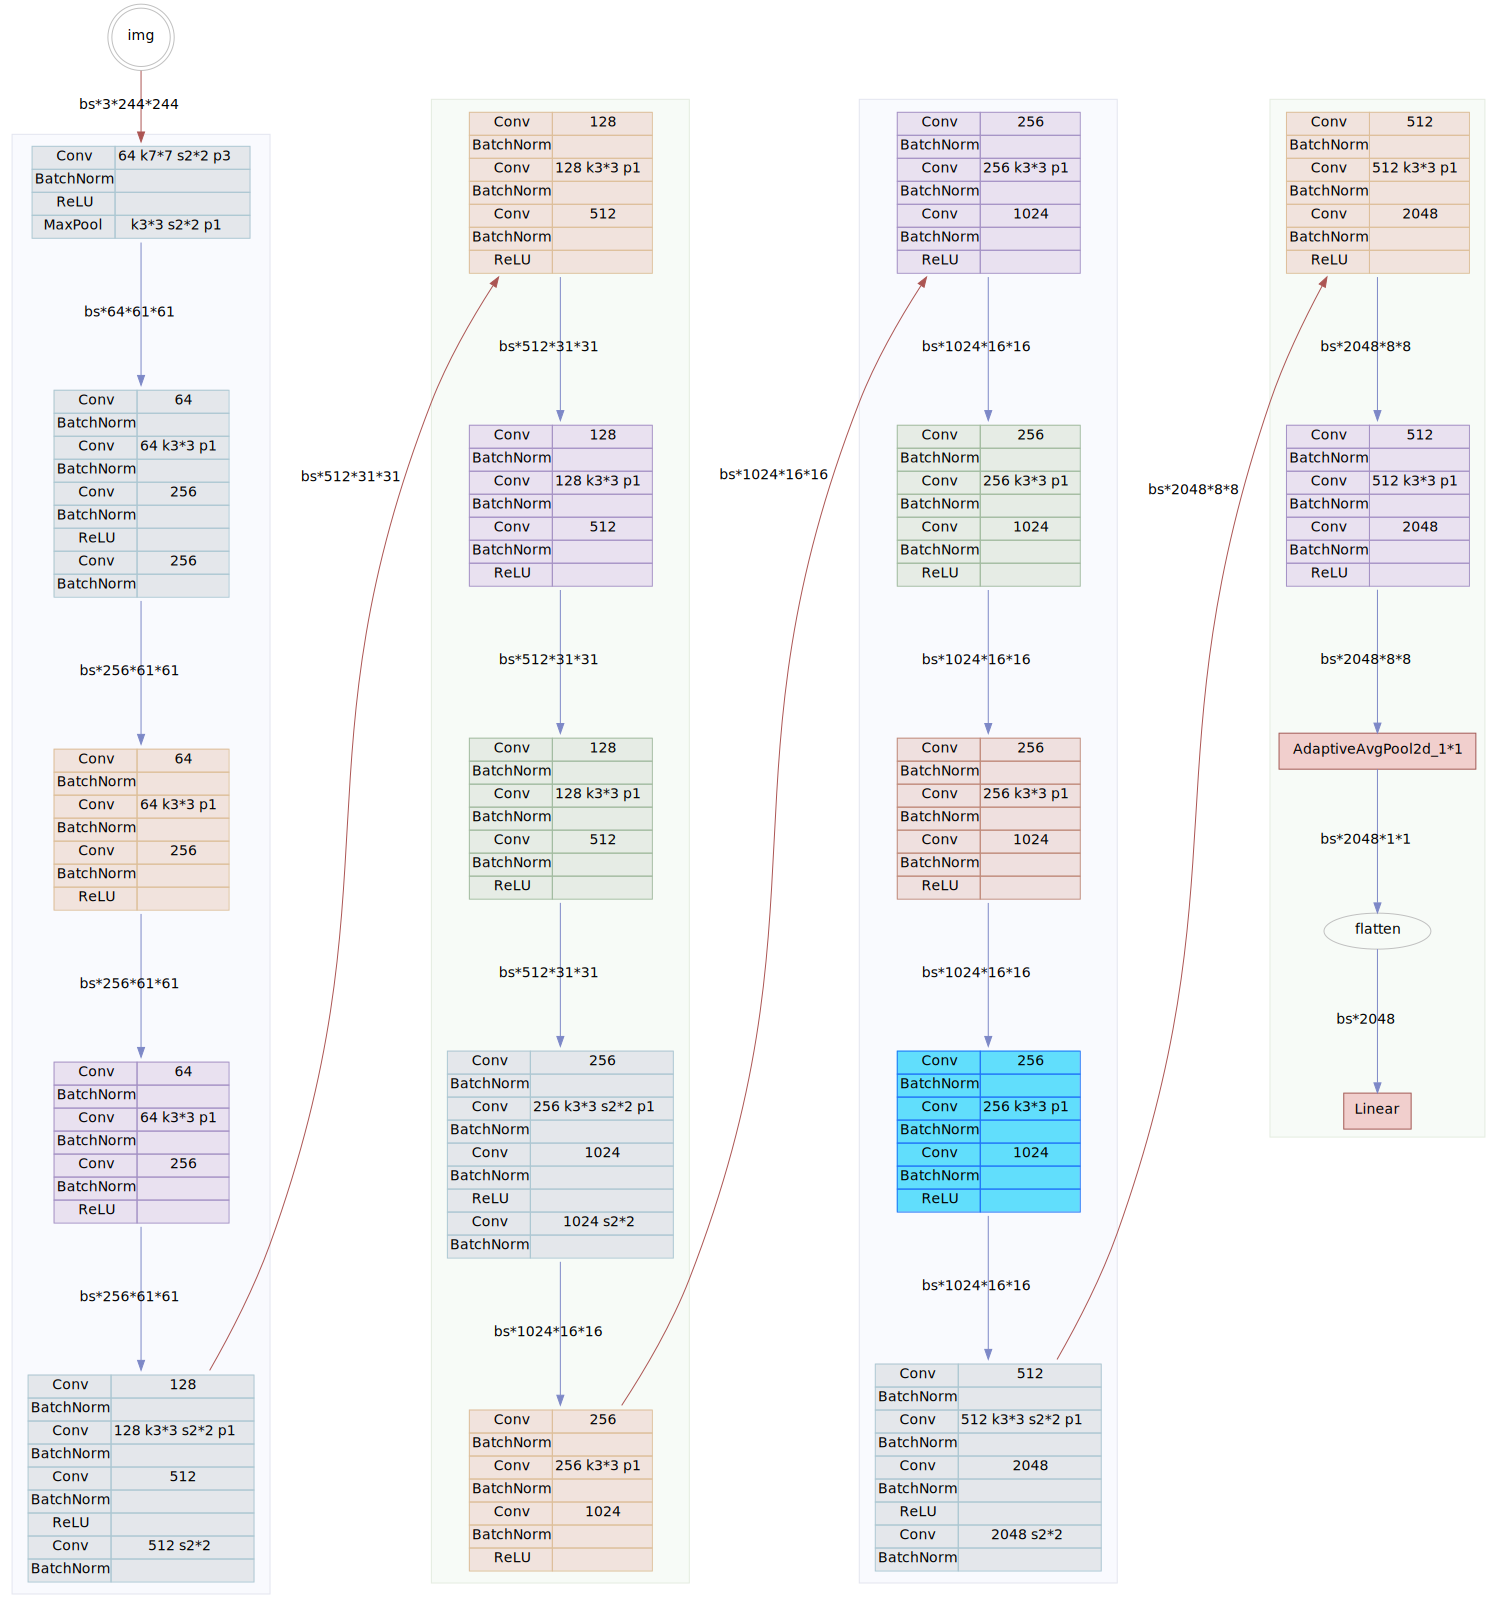

In [1]:
import graphviz

FONT_NAME = "Fira Code Retina"
graph = graphviz.Digraph(name="ResNet50", format='png',node_attr={'shape': 'plaintext'}, edge_attr = {"constraint":"false"})
graph.attr(nodesep="0.5", rankdir="LR")

with graph.subgraph(name="cluster_1") as sub1:
    sub1.attr(bgcolor="#F9FAFE", color="#E3E5EF")
    with graph.subgraph() as s:
        s.node("block1", '''<
            <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E4E7EB" color="#ACC7D2">
            <tr><td>Conv</td><td>64 k7*7 s2*2 p3</td></tr>
            <tr><td>BatchNorm</td><td></td></tr>
            <tr><td>ReLU</td><td></td></tr>
            <tr><td>MaxPool</td><td>k3*3 s2*2 p1</td></tr>
            </table>
            >''', fontname=FONT_NAME)
        s.node('block2', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E4E7EB" color="#ACC7D2">
                <tr><td>Conv</td><td>64</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>Conv</td><td>64 k3*3 p1</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>Conv</td><td>256</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>ReLU</td><td></td></tr>
                <tr><td>Conv</td><td>256</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                </table>
                >''', fontname=FONT_NAME)
        s.node('block3', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#F1E3DD" color="#DDBF9A">
                    <tr><td>Conv</td><td>64</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>Conv</td><td>64 k3*3 p1</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>Conv</td><td>256</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block4', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E9E1F0" color="#A592C5">
                    <tr><td>Conv</td><td>64</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>Conv</td><td>64 k3*3 p1</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>Conv</td><td>256</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block5', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E4E7EB" color="#ACC7D2">
                    <tr><td>Conv</td><td>128</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>Conv</td><td>128 k3*3 s2*2 p1</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>Conv</td><td>512</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>512 s2*2</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
    sub1.edge("block1", "block2", label="bs*64*61*61", color="#7D88C7", fontname=FONT_NAME)
    sub1.edge("block2", "block3", color="#7D88C7", label="bs*256*61*61", fontname=FONT_NAME)
    sub1.edge("block3", "block4", color="#7D88C7", label="bs*256*61*61", fontname=FONT_NAME)
    sub1.edge("block4", "block5", label="bs*256*61*61", color="#7D88C7", fontname=FONT_NAME)

graph.node('img', shape="doublecircle", color="grey", fontname=FONT_NAME)
graph.edge("img", "block1", label="bs*3*244*244", color="#AC5553", fontname=FONT_NAME)


with graph.subgraph(name="cluster_2") as sub2:
    sub2.attr(color="#E4ECE0", bgcolor="#F7FBF7")
    with graph.subgraph() as s:
        s.node('block6', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#F1E3DD" color="#DDBF9A">
                    <tr><td>Conv</td><td>128</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>Conv</td><td>128 k3*3 p1</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>Conv</td><td>512</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block7', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E9E1F0" color="#A592C5">
                    <tr><td>Conv</td><td>128</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>Conv</td><td>128 k3*3 p1</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>Conv</td><td>512</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block8', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E6ECE5" color="#A2BBA0">
                    <tr><td>Conv</td><td>128</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>Conv</td><td>128 k3*3 p1</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>Conv</td><td>512</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block9', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E4E7EB" color="#ACC7D2">
                    <tr><td>Conv</td><td>256</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>Conv</td><td>256 k3*3 s2*2 p1</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>Conv</td><td>1024</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>1024 s2*2</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block10', '''<
                        <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#F1E3DD" color="#DDBF9A">
                        <tr><td>Conv</td><td>256</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>Conv</td><td>256 k3*3 p1</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>Conv</td><td>1024</td></tr>
                        <tr><td>BatchNorm</td><td></td></tr>
                        <tr><td>ReLU</td><td></td></tr>
                        </table>
                        >''', fontname=FONT_NAME)

    sub2.edge("block6", "block7", color="#7D88C7", label="bs*512*31*31", fontname=FONT_NAME)
    sub2.edge("block7", "block8", color="#7D88C7", label="bs*512*31*31", fontname=FONT_NAME)
    sub2.edge("block8", "block9", color="#7D88C7", label="bs*512*31*31", fontname=FONT_NAME)
    sub2.edge("block9", "block10", color="#7D88C7", label="bs*1024*16*16", fontname=FONT_NAME)

graph.node("T0", style="invis")
graph.edge("block1", "T0", constraint="true", style="invis")
graph.edge("T0", "block6", constraint="true", style="invis")

graph.edge("block5", "block6", color="#AC5553", label="bs*512*31*31", fontname=FONT_NAME)

with graph.subgraph(name="cluster_3") as sub3:
    sub3.attr(color="#E3E5EF", bgcolor="#F9FAFE")
    with graph.subgraph() as s:
        s.node('block11', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E9E1F0" color="#A592C5">
                    <tr><td>Conv</td><td>256</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>Conv</td><td>256 k3*3 p1</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>Conv</td><td>1024</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block12', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E6ECE5" color="#A2BBA0">
                    <tr><td>Conv</td><td>256</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>Conv</td><td>256 k3*3 p1</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>Conv</td><td>1024</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block13', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#EFE0DF" color="#C08B7B">
                    <tr><td>Conv</td><td>256</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>Conv</td><td>256 k3*3 p1</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>Conv</td><td>1024</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block14', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#61DEFC" color="#2075F8">
                    <tr><td>Conv</td><td>256</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>Conv</td><td>256 k3*3 p1</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>Conv</td><td>1024</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block15', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E4E7EB" color="#ACC7D2">
                    <tr><td>Conv</td><td>512</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>Conv</td><td>512 k3*3 s2*2 p1</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>Conv</td><td>2048</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    <tr><td>Conv</td><td>2048 s2*2</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    </table>
                    >''', fontname=FONT_NAME)

    sub3.edge("block11", "block12", color="#7D88C7", label="bs*1024*16*16", fontname=FONT_NAME)
    sub3.edge("block12", "block13", color="#7D88C7", label="bs*1024*16*16", fontname=FONT_NAME)
    sub3.edge("block13", "block14", color="#7D88C7", label="bs*1024*16*16", fontname=FONT_NAME)
    sub3.edge("block14", "block15", color="#7D88C7", label="bs*1024*16*16", fontname=FONT_NAME)

graph.node("T1", style="invis")
graph.edge("block6", "T1", constraint="true", style="invis")
graph.edge("T1", "block11", constraint="true", style="invis")
graph.edge("block10", "block11", color="#AC5553", label="bs*1024*16*16", fontname=FONT_NAME)

with graph.subgraph(name="cluster_4") as sub4:
    sub4.attr(color="#E4ECE0", bgcolor="#F7FBF7")
    with graph.subgraph() as s:
        s.node('block16', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#F1E3DD" color="#DDBF9A">
                    <tr><td>Conv</td><td>512</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>Conv</td><td>512 k3*3 p1</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>Conv</td><td>2048</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node('block17', '''<
                    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E9E1F0" color="#A592C5">
                    <tr><td>Conv</td><td>512</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>Conv</td><td>512 k3*3 p1</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>Conv</td><td>2048</td></tr>
                    <tr><td>BatchNorm</td><td></td></tr>
                    <tr><td>ReLU</td><td></td></tr>
                    </table>
                    >''', fontname=FONT_NAME)
        s.node("block18", shape="box", color="#A25954", style="filled", fillcolor="#F1CFCD", label="AdaptiveAvgPool2d_1*1", fontname=FONT_NAME)
        s.node("block19", shape="ellipse", color="grey", label="flatten", fontname=FONT_NAME)
        s.node("block20", shape="box", color="#A25954", style="filled", fillcolor="#F1CFCD", label="Linear", fontname=FONT_NAME)

    sub4.edge("block16", "block17", color="#7D88C7", label="bs*2048*8*8", fontname=FONT_NAME)
    sub4.edge("block17", "block18", color="#7D88C7", label="bs*2048*8*8", fontname=FONT_NAME)
    sub4.edge("block18", "block19", color="#7D88C7", label="bs*2048*1*1", fontname=FONT_NAME)
    sub4.edge("block19", "block20", color="#7D88C7", label="bs*2048", fontname=FONT_NAME)

graph.node("T2", style="invis")
graph.edge("block11", "T2", constraint="true", style="invis")
graph.edge("T2", "block16", constraint="true", style="invis")
graph.edge("block15", "block16", color="#AC5553", label="bs*2048*8*8", fontname=FONT_NAME)

graph